In [1]:
import numpy as np
import pandas as pd 
import re
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (
    export_graphviz,
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
    GradientBoostingClassifier,
    RandomForestRegressor
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay, 
    recall_score,
    precision_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedShuffleSplit,
    cross_val_score,
    RandomizedSearchCV
)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
keywords = ["auto","construct","capital_market","chemicals","equipment",
            "transport","semi","bank","steel",
            "telecom","staples","discretionary","kospi"]

In [3]:
dfs = {}  # 빈 딕셔너리 생성
column_names_per_keyword = {}

# 각 키워드에 해당하는 데이터프레임을 dfs 딕셔너리에 추가
for keyword in keywords:
    dfs[keyword] = pd.read_excel(r"07_02_total.xlsx", sheet_name=keyword, header=0, index_col=0)
    column_names_per_keyword[keyword] = dfs[keyword].columns.tolist()

    print(f"Compile {keyword}")

# 각 데이터프레임의 인덱스를 날짜 형식으로 변환한 후 문자열로 변경
for keyword, df in dfs.items():
    df.index = pd.to_datetime(df.index)
    df.index = df.index.strftime('%Y-%m-%d')

# 첫 2개 행을 출력
for keyword, df in dfs.items():
    print(f"Top 2 rows of {keyword}:")
    print(df.head(2))
    print(column_names_per_keyword[keyword])

# 첫 번째 데이터프레임의 인덱스를 df_index에 복사하여 초기화
df_index_auto = list(dfs.values())[0]
df_index_construct = list(dfs.values())[1]
df_index_capital_market = list(dfs.values())[2]
df_index_chemicals = list(dfs.values())[3]
df_index_equipment = list(dfs.values())[4]
df_index_transport = list(dfs.values())[5]
df_index_semi = list(dfs.values())[6]
df_index_bank = list(dfs.values())[7]
df_index_steel = list(dfs.values())[8]
df_index_telecom = list(dfs.values())[9]
df_index_staples = list(dfs.values())[10]
df_index_discretionary = list(dfs.values())[11]
df_index_kospi = list(dfs.values())[12]


Compile auto
Compile construct
Compile capital_market
Compile chemicals
Compile equipment
Compile transport
Compile semi
Compile bank
Compile steel
Compile telecom
Compile staples
Compile discretionary
Compile kospi
Top 2 rows of auto:
             auto    WTI  DGS2  DGS10  TIPS    VIX    PPI    per   pbr  \
date                                                                     
2010-04-07  S_buy  85.64  1.06   3.89  1.55  16.62  172.2  24.26  1.39   
2010-04-08  S_buy  85.17  1.09   3.91  1.58  16.48  172.2  24.42  1.39   

               원달러  ...   구리선물_60  중국고정자산투자(yoy%)_60  중국 PMI_60   금 선물_60  \
date                ...                                                     
2010-04-07  1120.5  ...  0.001518          -0.003370  -0.001632  0.000112   
2010-04-08  1123.3  ...  0.001700          -0.003414  -0.001553  0.000216   

            달러 인덱스_60  중국 소매판매_60  중국 산업 생산_60  MSCI_EMER_60  US_auto_60  \
date                                                                       
2010-0

In [4]:
# 각 데이터프레임의 열 이름 출력
for keyword, column_names in column_names_per_keyword.items():
    print(f"Column names for {keyword}: {column_names}")


Column names for auto: ['auto', 'WTI', 'DGS2', 'DGS10', 'TIPS', 'VIX', 'PPI', 'per', 'pbr', '원달러', '원엔', '3년물 ', '10년물 ', 'treasury_10_3_diff', 'T10Y2Y', 'usa_cpi', 'us_e_infla', 'yield_gap(%)', 'cpi', 'export', '구리선물', '중국고정자산투자(yoy%)', '중국 PMI', '금 선물', '달러 인덱스', '중국 소매판매', '중국 산업 생산', 'MSCI_EMER', 'US_auto', 'export_auto', 'WTI_20', 'DGS2_20', 'DGS10_20', 'TIPS_20', 'VIX_20', 'PPI_20', 'per_20', 'pbr_20', '원달러_20', '원엔_20', '3년물 _20', '10년물 _20', 'treasury_10_3_diff_20', 'T10Y2Y_20', 'usa_cpi_20', 'us_e_infla_20', 'yield_gap(%)_20', 'cpi_20', 'export_20', '구리선물_20', '중국고정자산투자(yoy%)_20', '중국 PMI_20', '금 선물_20', '달러 인덱스_20', '중국 소매판매_20', '중국 산업 생산_20', 'MSCI_EMER_20', 'US_auto_20', 'export_auto_20', 'WTI_60', 'DGS2_60', 'DGS10_60', 'TIPS_60', 'VIX_60', 'PPI_60', 'per_60', 'pbr_60', '원달러_60', '원엔_60', '3년물 _60', '10년물 _60', 'treasury_10_3_diff_60', 'T10Y2Y_60', 'usa_cpi_60', 'us_e_infla_60', 'yield_gap(%)_60', 'cpi_60', 'export_60', '구리선물_60', '중국고정자산투자(yoy%)_60', '중국 PMI_60', '금 선물_6

In [5]:
print(len(df_index_kospi.columns))
print(len(df_index_discretionary.columns))


82
88


In [6]:
# 첫 2개 행을 출력
for keyword, df in dfs.items():
    print(f"Top 2 rows of {keyword}:")
    print(df.head(2))
    print(f"Column names for {keyword}: {column_names_per_keyword[keyword]}")


Top 2 rows of auto:
             auto    WTI  DGS2  DGS10  TIPS    VIX    PPI    per   pbr  \
date                                                                     
2010-04-07  S_buy  85.64  1.06   3.89  1.55  16.62  172.2  24.26  1.39   
2010-04-08  S_buy  85.17  1.09   3.91  1.58  16.48  172.2  24.42  1.39   

               원달러  ...   구리선물_60  중국고정자산투자(yoy%)_60  중국 PMI_60   금 선물_60  \
date                ...                                                     
2010-04-07  1120.5  ...  0.001518          -0.003370  -0.001632  0.000112   
2010-04-08  1123.3  ...  0.001700          -0.003414  -0.001553  0.000216   

            달러 인덱스_60  중국 소매판매_60  중국 산업 생산_60  MSCI_EMER_60  US_auto_60  \
date                                                                       
2010-04-07   0.000835    0.005952    -0.006532      0.000767   -0.001121   
2010-04-08   0.000818    0.005882    -0.006144      0.000953   -0.000906   

            export_auto_60  
date                        
2010-04-07 

In [7]:
df_index_telecom.head(2)

,telecom,WTI,DGS2,DGS10,TIPS,VIX,PPI,per,pbr,원달러,...,구리선물_60,중국고정자산투자(yoy%)_60,중국 PMI_60,금 선물_60,달러 인덱스_60,중국 소매판매_60,중국 산업 생산_60,MSCI_EMER_60,통신배당_60,IT산업별/월별 수출 현황 중 통신기기 소계_60
date,,,,,,,,,,,,,,,,,,,,,
2010-04-07,buy,85.64,1.06,3.89,1.55,16.62,172.2,24.26,1.39,1120.5,...,0.001518,-0.003370,-0.001632,0.000112,0.000835,0.005952,-0.006532,0.000767,0.000232,-0.000123
2010-04-08,buy,85.17,1.09,3.91,1.58,16.48,172.2,24.42,1.39,1123.3,...,0.001700,-0.003414,-0.001553,0.000216,0.000818,0.005882,-0.006144,0.000953,0.000295,0.000248


In [8]:
for keyword, df in dfs.items():
    df.head(2).info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2010-04-07 to 2010-04-08
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   auto                   2 non-null      object 
 1   WTI                    2 non-null      float64
 2   DGS2                   2 non-null      float64
 3   DGS10                  2 non-null      float64
 4   TIPS                   2 non-null      float64
 5   VIX                    2 non-null      float64
 6   PPI                    2 non-null      float64
 7   per                    2 non-null      float64
 8   pbr                    2 non-null      float64
 9   원달러                    2 non-null      float64
 10  원엔                     2 non-null      float64
 11  3년물                    2 non-null      float64
 12  10년물                   2 non-null      float64
 13  treasury_10_3_diff     2 non-null      float64
 14  T10Y2Y                 2 non-null      float64
 1

In [9]:
data_splits = {}
last_rows = {}  # 각 키워드의 마지막 행을 저장할 딕셔너리

for keyword, df_index in dfs.items():
    # 각 키워드의 마지막 행 추출 및 저장
    last_row = df_index.iloc[-1]  # 마지막 행 저장
    last_rows[keyword] = last_row  # 추출된 마지막 행을 저장
    
    df_dropna = df_index.dropna()  # 결측치가 있는 행 제거
    
    if df_dropna.empty:
        print(f"Error: Dataframe for {keyword} is empty.")
    else:
        # 종속 변수(y) 및 독립 변수(X) 설정
        y_keyword = df_dropna[keyword]  # 현재 키워드에 해당하는 종속 변수
        X_keyword = df_dropna.drop(columns=[keyword])  # 현재 키워드를 제외한 나머지 열은 독립 변수로 사용

        # 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(X_keyword, y_keyword, test_size=0.2, random_state=0)
        
        # 데이터 정규화
        normalizer = StandardScaler()
        X_train_normalized = normalizer.fit_transform(X_train)
        X_test_normalized = normalizer.transform(X_test)

        # 데이터 저장
        data_splits[keyword] = {
            'X_train': X_train_normalized,
            'X_test': X_test_normalized,
            'y_train': y_train,
            'y_test': y_test
        }

        print(f'Train set dimension for {keyword} is {X_train_normalized.shape}')
        print(f'Test set dimension for {keyword} is {X_test_normalized.shape}')
        # 훈련 데이터와 테스트 데이터의 클래스 비율 확인
        train_class_counts = {label: sum(y_train == label) for label in set(y_keyword)}
        test_class_counts = {label: sum(y_test == label) for label in set(y_keyword)}

        print(f"훈련 데이터 클래스 비율 for {keyword}:", train_class_counts)
        print(f"테스트 데이터 클래스 비율 for {keyword}:", test_class_counts)

# 결측치 제거 이후의 데이터프레임의 마지막 행 출력
for keyword, last_row in last_rows.items():
    print(f"마지막 행 {keyword}: {last_row}")
    print(len(last_row))


Train set dimension for auto is (2669, 87)
Test set dimension for auto is (668, 87)
훈련 데이터 클래스 비율 for auto: {'S_buy': 612, 'buy': 753, 'sell': 1304}
테스트 데이터 클래스 비율 for auto: {'S_buy': 172, 'buy': 180, 'sell': 316}
Train set dimension for construct is (2669, 87)
Test set dimension for construct is (668, 87)
훈련 데이터 클래스 비율 for construct: {'buy': 607, 'S_buy': 726, 'sell': 1336}
테스트 데이터 클래스 비율 for construct: {'buy': 159, 'S_buy': 184, 'sell': 325}
Train set dimension for capital_market is (2669, 87)
Test set dimension for capital_market is (668, 87)
훈련 데이터 클래스 비율 for capital_market: {'buy': 678, 'S_buy': 644, 'sell': 1347}
테스트 데이터 클래스 비율 for capital_market: {'buy': 165, 'S_buy': 170, 'sell': 333}
Train set dimension for chemicals is (2669, 87)
Test set dimension for chemicals is (668, 87)
훈련 데이터 클래스 비율 for chemicals: {'buy': 732, 'S_buy': 659, 'sell': 1278}
테스트 데이터 클래스 비율 for chemicals: {'buy': 177, 'S_buy': 174, 'sell': 317}
Train set dimension for equipment is (2669, 87)
Test set dimensi

In [10]:
y_keyword.head(3)

date
2010-04-07    sell
2010-04-08    sell
2010-04-09    sell
Name: kospi, dtype: object

### 여러가지 실험을 했다
1. logistic_regression
2. random_forest
3. gradient_boosting
4. svm
5. neural_network

In [11]:
# 각 키워드에 대한 최고 성능 모델과 정확도를 저장할 딕셔너리
best_models = {}
best_accuracies = {}

# 각 키워드에 대한 분류기 및 Voting Classifier 생성
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    X_test = data_split['X_test']
    y_train = data_split['y_train']
    y_test = data_split['y_test']
    
    accuracies = {}  # 키워드마다 새로운 accuracies 딕셔너리 생성

    random_forest = RandomForestClassifier()
    gradient_boosting = GradientBoostingClassifier()
    svm = SVC()
    knn = KNeighborsClassifier()
    decision_tree = DecisionTreeClassifier()

    # Voting Classifier 생성
    voting_classifier = VotingClassifier(
        estimators=[
            ('rf', random_forest), 
            ('gb', gradient_boosting), 
            ('svm', svm), 
            ('knn', knn),
            ('dt', decision_tree)
        ],
        voting='hard'
    )

    models = {
        'Random Forest': random_forest,
        'Gradient Boosting': gradient_boosting,
        'Support Vector Machine': svm,
        'K-Nearest Neighbors': knn,
        'Decision Tree': decision_tree,
        'Voting Classifier': voting_classifier
    }

    # 각 분류기에 대해 학습하고 평가
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy

    # 가장 높은 정확도를 가진 모델 찾기
    best_model_name = max(accuracies, key=accuracies.get)
    best_accuracy = accuracies[best_model_name]
    
    # 최고 성능 모델과 정확도를 저장
    best_models[keyword] = best_model_name
    best_accuracies[keyword] = best_accuracy
    print(f"{keyword}에서 최고의 성능을 보인 모델은 {best_model_name}로, 정확도는 {best_accuracy:.3f}입니다.")

def print_best_model(keyword):
    best_model_name = best_models.get(keyword)
    if best_model_name:
        accuracy = best_accuracies.get(keyword)

# 각 키워드별 최고 성능의 모델 출력
for keyword in data_splits.keys():
    print_best_model(keyword)


auto에서 최고의 성능을 보인 모델은 Voting Classifier로, 정확도는 0.838입니다.
construct에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.828입니다.
capital_market에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.817입니다.
chemicals에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.853입니다.
equipment에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.849입니다.
transport에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.847입니다.
semi에서 최고의 성능을 보인 모델은 Voting Classifier로, 정확도는 0.781입니다.
bank에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.831입니다.
steel에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.828입니다.
telecom에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.847입니다.
staples에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.862입니다.
discretionary에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.832입니다.
kospi에서 최고의 성능을 보인 모델은 Random Forest로, 정확도는 0.867입니다.


### 최고의 성능 대부분은 Random Forest 모델로, 정확도는 대부분 0.8 이상 


### 따라서 randomforest 로 진행

### 그러면은 렌덤 포레스트 단순 모델링을 해보자

In [12]:
# Train set 및 Test set에 대한 성능을 저장할 딕셔너리 생성
performance_results = {}

# Random Forest 모델 생성
rfc = RandomForestClassifier()

# 각 키워드에 대해 모델을 학습하고 Train set 및 Test set에 대한 성능을 측정
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']
    X_test = data_split['X_test']
    y_test = data_split['y_test']
    
    # 모델 학습
    rfc.fit(X_train, y_train)

    # Train set에 대한 성능 측정
    y_pred_train = rfc.predict(X_train)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)

    # Test set에 대한 성능 측정
    y_pred_test = rfc.predict(X_test)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    # 결과 저장
    performance_results[keyword] = {
        'Train 성능': acc_train,
        'Test 성능': acc_test
    }

# 각 키워드에 대한 Train set 및 Test set의 성능 출력
for keyword, performance in performance_results.items():
    print(f"{keyword} 키워드에 대한 성능: ",performance['Test 성능'])
    print()

auto 키워드에 대한 성능:  0.8278443113772455

construct 키워드에 대한 성능:  0.8173652694610778

capital_market 키워드에 대한 성능:  0.8233532934131736

chemicals 키워드에 대한 성능:  0.8398203592814372

equipment 키워드에 대한 성능:  0.8473053892215568

transport 키워드에 대한 성능:  0.8562874251497006

semi 키워드에 대한 성능:  0.7829341317365269

bank 키워드에 대한 성능:  0.8323353293413174

steel 키워드에 대한 성능:  0.8203592814371258

telecom 키워드에 대한 성능:  0.8502994011976048

staples 키워드에 대한 성능:  0.8547904191616766

discretionary 키워드에 대한 성능:  0.8248502994011976

kospi 키워드에 대한 성능:  0.8877245508982036



C:\Users\user\AppData\Local\Temp\ipykernel_35532\776093913.py:30: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35532\776093913.py:30: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35532\776093913.py:30: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35532\776093913.py:30: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35532\776093913.py:30: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35532\776093913.py:30: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaV

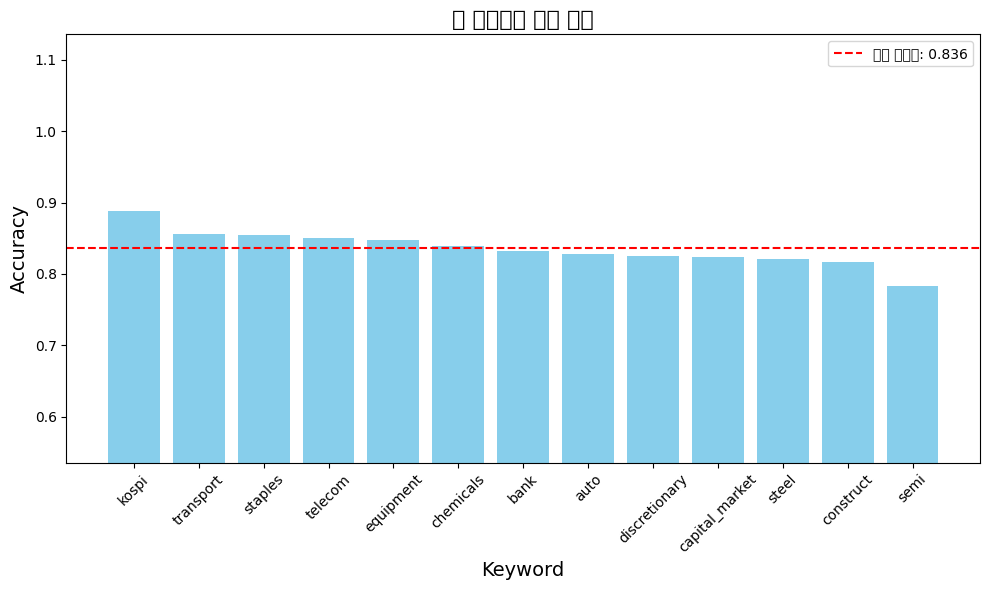

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Train set 및 Test set에 대한 성능 추출
keywords = list(performance_results.keys())
train_accuracies = [performance['Train 성능'] for performance in performance_results.values()]
test_accuracies = [performance['Test 성능'] for performance in performance_results.values()]

# 성능을 내림차순으로 정렬
sorted_indices = sorted(range(len(test_accuracies)), key=lambda i: test_accuracies[i], reverse=True)
sorted_keywords = [keywords[i] for i in sorted_indices]
sorted_test_accuracies = [test_accuracies[i] for i in sorted_indices]

# 그래프 출력
plt.figure(figsize=(10, 6))
plt.bar(sorted_keywords, sorted_test_accuracies, color='skyblue')
plt.xlabel('Keyword', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('각 키워드에 대한 성능', fontsize=16)
plt.xticks(rotation=45)

# 정확도 평균 계산
mean_accuracy = np.mean(sorted_test_accuracies)
plt.axhline(y=mean_accuracy, color='red', linestyle='--', label=f'평균 정확도: {mean_accuracy:.3f}')

# y축 범위 조정하여 확대
plt.ylim(mean_accuracy - 0.3, mean_accuracy + 0.3)

plt.legend()
plt.tight_layout()
plt.show()


### test set에 대해서 성능이 한 80~87%정도 나온다 약간 상승!

### 이러면 조금더 스케일링을 해서 정확도를 높이는 작업을 진행하자

100%|██████████| 20/20 [00:14<00:00,  1.42it/s]


auto 키워드에 대한 최적의 트리 수는 17, 최적의 깊이는 18 입니다.
construct 키워드에 대한 최적의 트리 수는 17, 최적의 깊이는 19 입니다.
capital_market 키워드에 대한 최적의 트리 수는 12, 최적의 깊이는 19 입니다.
chemicals 키워드에 대한 최적의 트리 수는 16, 최적의 깊이는 17 입니다.
equipment 키워드에 대한 최적의 트리 수는 16, 최적의 깊이는 20 입니다.
transport 키워드에 대한 최적의 트리 수는 20, 최적의 깊이는 15 입니다.
semi 키워드에 대한 최적의 트리 수는 20, 최적의 깊이는 16 입니다.
bank 키워드에 대한 최적의 트리 수는 19, 최적의 깊이는 20 입니다.
steel 키워드에 대한 최적의 트리 수는 19, 최적의 깊이는 20 입니다.
telecom 키워드에 대한 최적의 트리 수는 14, 최적의 깊이는 20 입니다.
staples 키워드에 대한 최적의 트리 수는 20, 최적의 깊이는 19 입니다.
discretionary 키워드에 대한 최적의 트리 수는 17, 최적의 깊이는 14 입니다.
kospi 키워드에 대한 최적의 트리 수는 20, 최적의 깊이는 13 입니다.


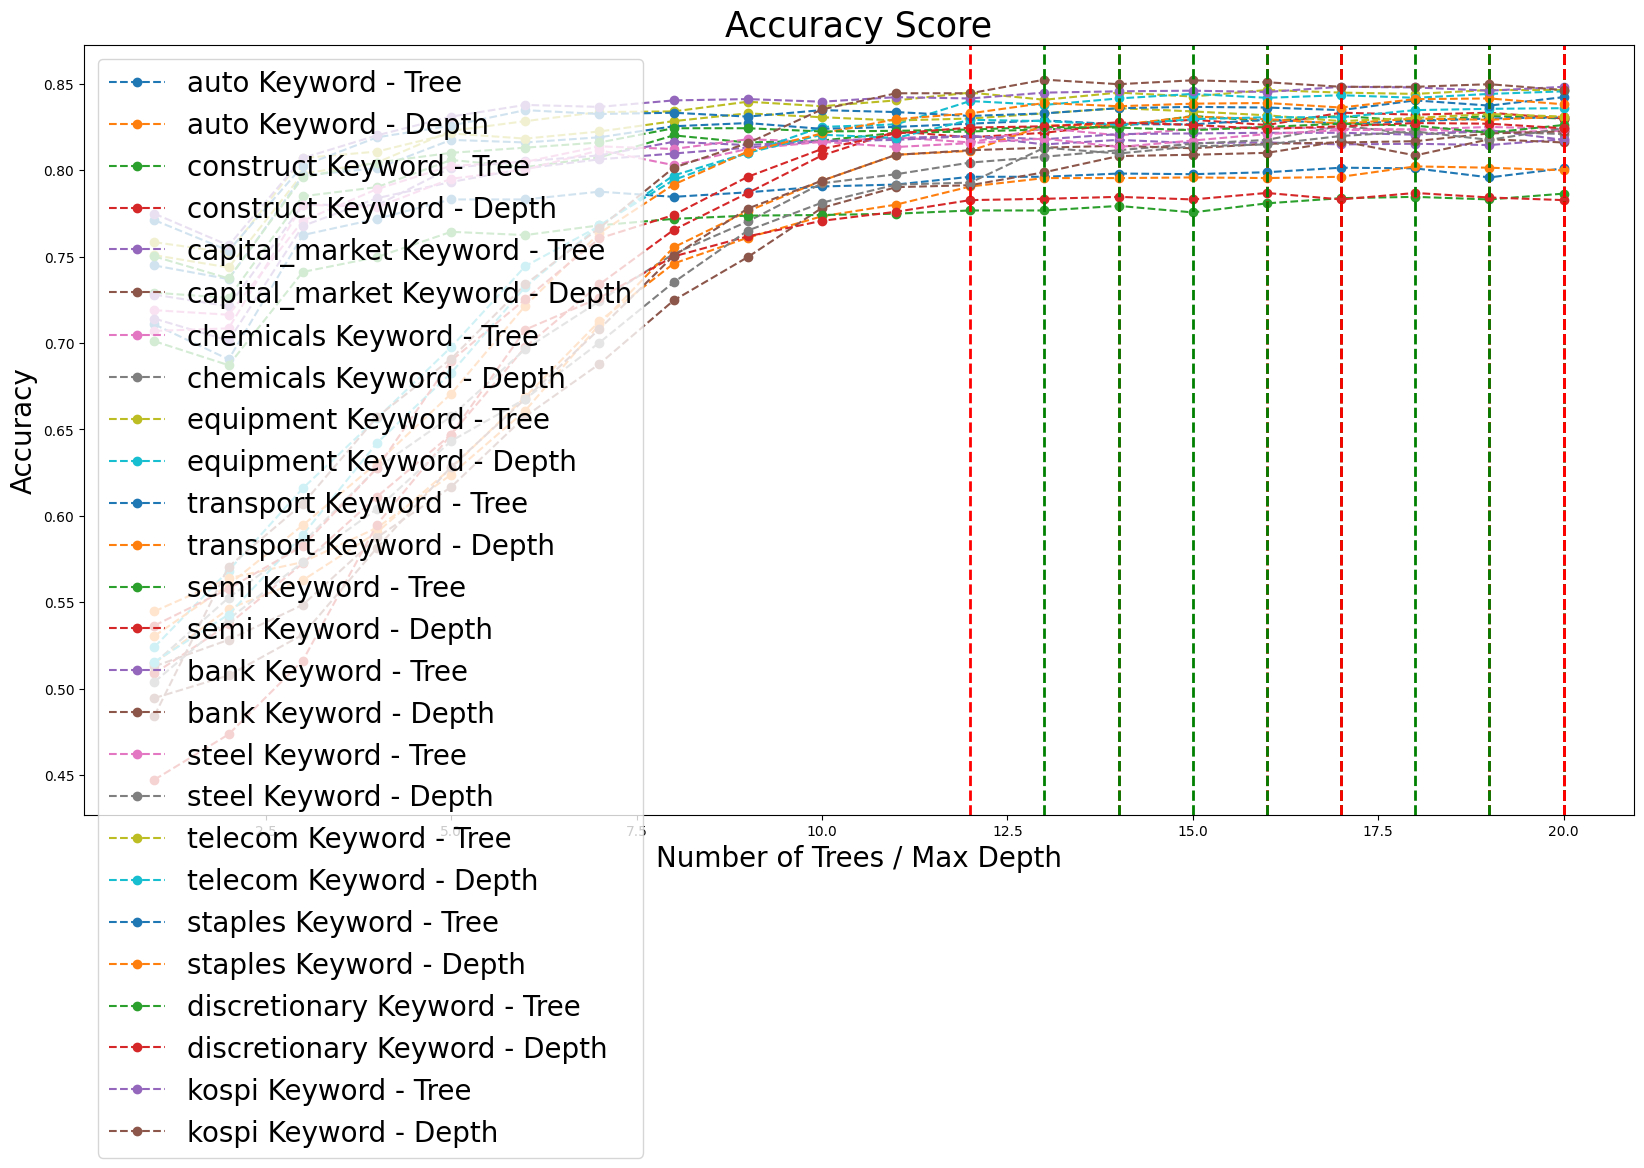

In [14]:
estimator_list = list(range(1, 21))  # 1부터 20까지의 값을 가지는 리스트
depth_list = list(range(1, 21))  # 1부터 20까지의 값을 가지는 리스트
cv_scores_per_keyword = {}  # 각 키워드에 대한 교차 검증 점수를 저장할 딕셔너리
best_estimators_per_keyword = {}  # 각 키워드에 대한 최적의 트리 수를 저장할 딕셔너리
best_depths_per_keyword = {}  # 각 키워드에 대한 최적의 깊이를 저장할 딕셔너리
# 각 키워드에 대한 분류기 및 Voting Classifier 생성

for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']
    
    cv_scores = []  # 교차 검증 점수를 저장할 리스트
    cv_scores_depth = []  # 교차 검증 점수를 저장할 리스트
    
    for i in tqdm(range(20)):
        rfc = RandomForestClassifier(n_estimators=i+1,
                                     max_leaf_nodes=300,
                                     n_jobs=-1,
                                     random_state=0)
        score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy').mean()
        cv_scores.append(score)

    best_estimator = estimator_list[np.argmax(cv_scores)]
    best_estimators_per_keyword[keyword] = best_estimator
    
    for i in tqdm(range(20)):
        rfc = RandomForestClassifier(n_estimators=best_estimator,
                                     max_depth=i+1,
                                     max_leaf_nodes=300,
                                     n_jobs=-1,
                                     random_state=0)
        score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy').mean()
        cv_scores_depth.append(score)

    best_depth = depth_list[np.argmax(cv_scores_depth)]
    best_depths_per_keyword[keyword] = best_depth
    
    # 교차 검증 점수를 딕셔너리에 저장
    cv_scores_per_keyword[keyword] = {'tree_scores': cv_scores, 'depth_scores': cv_scores_depth}

# 각 키워드에 대한 최적의 트리 수와 깊이 출력
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    print(f"{keyword} 키워드에 대한 최적의 트리 수는 {best_estimator}, 최적의 깊이는 {best_depth} 입니다.")

# 각 키워드에 대한 교차 검증 점수 시각화
plt.figure(figsize=(20, 10))
for keyword, scores in cv_scores_per_keyword.items():
    plt.plot(estimator_list, scores['tree_scores'], marker='o', linestyle='dashed', label=f"{keyword} Keyword - Tree")
    plt.plot(depth_list, scores['depth_scores'], marker='o', linestyle='dashed', label=f"{keyword} Keyword - Depth")
plt.legend(fontsize=20)
plt.xlabel("Number of Trees / Max Depth", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    plt.axvline(best_estimator, color='r', linestyle='--', linewidth=2)
    plt.axvline(best_depth, color='g', linestyle='--', linewidth=2)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 각 키워드별 최적의 트리 개수와 최적의 깊이 출력
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]

    
    # 최적의 트리 개수와 깊이를 사용하여 RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    
    # 교차 검증을 통한 정확도 측정
    cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
    
    # 평균 정확도 출력
    print(f"{keyword} 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)")
    print(f"평균 정확도: {cv_scores.mean():.4f}")
    
    # Train set에 대한 최적의 모델 학습
    rfc.fit(X_train, y_train)
    
    # Test set에 대한 예측값 생성
    y_pred = rfc.predict(X_test)
    
    # Test set에 대한 정확도 계산 및 출력
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred)
    print(f"{keyword} 키워드에 대한 Test set에 대한 성능")
    print(f"정확도: {acc_test:.4f}\n")
    
    # Test set에 대한 민감도와 정밀도 계산
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')

    # 민감도와 정밀도 출력
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_test, y_pred)




auto 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8509
auto 키워드에 대한 Test set에 대한 성능
정확도: 0.8623

construct 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8535
construct 키워드에 대한 Test set에 대한 성능
정확도: 0.8638

capital_market 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8445
capital_market 키워드에 대한 Test set에 대한 성능
정확도: 0.8593

chemicals 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8490
chemicals 키워드에 대한 Test set에 대한 성능
정확도: 0.8623

equipment 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8460
equipment 키워드에 대한 Test set에 대한 성능
정확도: 0.8563

transport 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8520
transport 키워드에 대한 Test set에 대한 성능
정확도: 0.8728

semi 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8509
semi 키워드에 대한 Test set에 대한 성능
정확도: 0.8638

bank 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8483
bank 키워드에 대한 Test set에 대한 성능
정확도: 0.8608

steel 키워드에 대한 Train set에 대한 

### 그 이전에 나온 값과 비교 해 보았을때 더 우수한 데이터 결과가 나옴

### 따라서 최종적으로 뽑아본다면은 이런식으로 나온다

auto 키워드에 대한 최적의 트리 개수: 17
auto 키워드에 대한 최적의 깊이 개수: 18
auto 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8509
auto 키워드에 대한 Test set에 대한 성능
정확도: 0.8623

auto 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8578, 정밀도: 0.8600



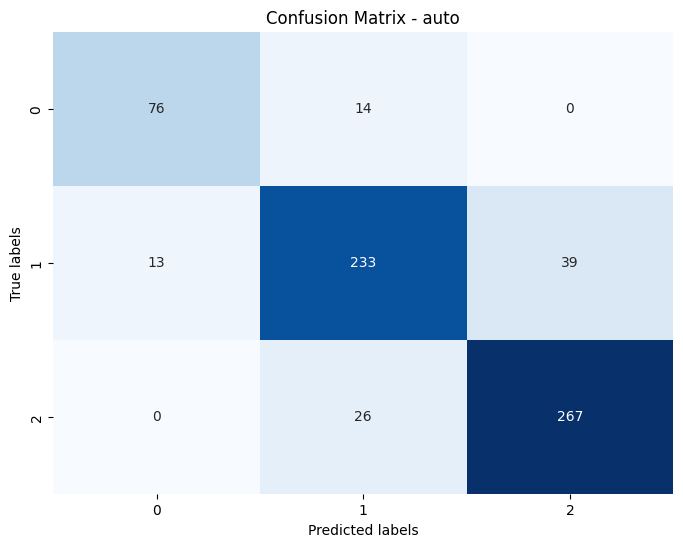

construct 키워드에 대한 최적의 트리 개수: 17
construct 키워드에 대한 최적의 깊이 개수: 19
construct 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8535
construct 키워드에 대한 Test set에 대한 성능
정확도: 0.8638

construct 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8563, 정밀도: 0.8564



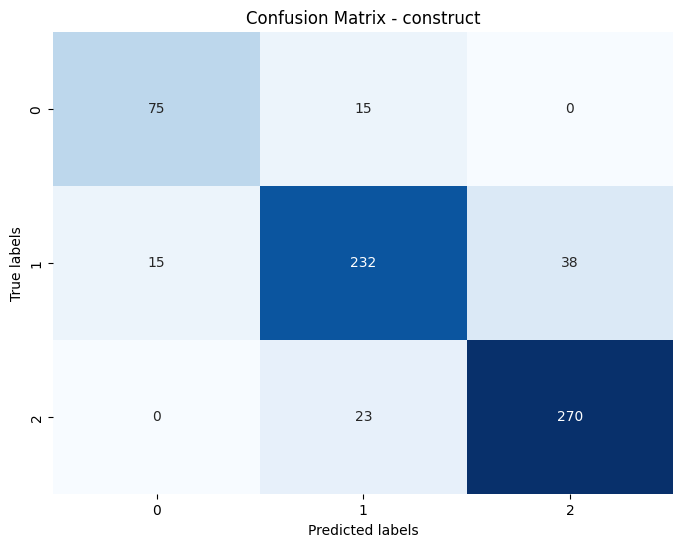

capital_market 키워드에 대한 최적의 트리 개수: 12
capital_market 키워드에 대한 최적의 깊이 개수: 19
capital_market 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8445
capital_market 키워드에 대한 Test set에 대한 성능
정확도: 0.8593

capital_market 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8503, 정밀도: 0.8502



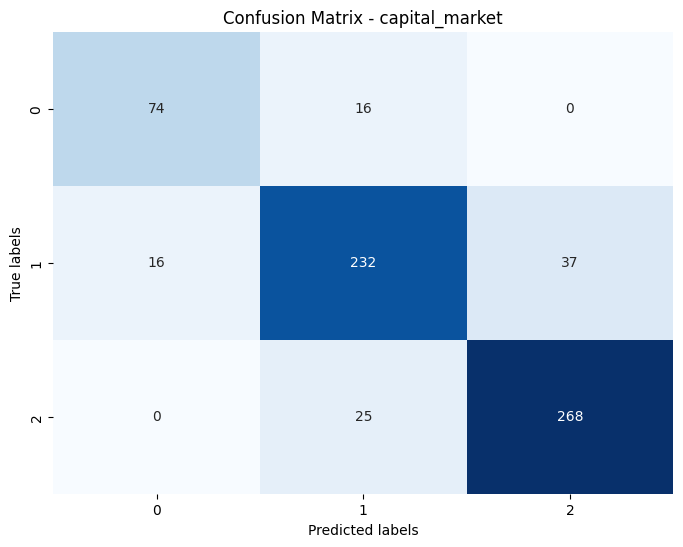

chemicals 키워드에 대한 최적의 트리 개수: 16
chemicals 키워드에 대한 최적의 깊이 개수: 17
chemicals 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8490
chemicals 키워드에 대한 Test set에 대한 성능
정확도: 0.8623

chemicals 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8578, 정밀도: 0.8578



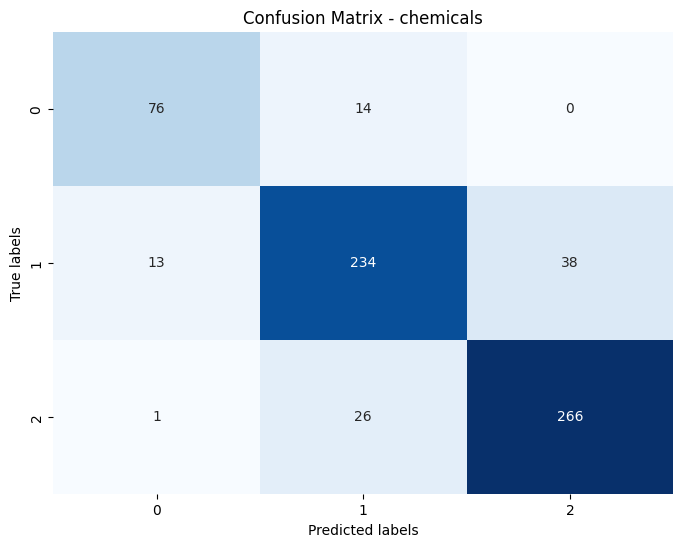

equipment 키워드에 대한 최적의 트리 개수: 16
equipment 키워드에 대한 최적의 깊이 개수: 20
equipment 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8460
equipment 키워드에 대한 Test set에 대한 성능
정확도: 0.8563

equipment 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8532, 정밀도: 0.8510



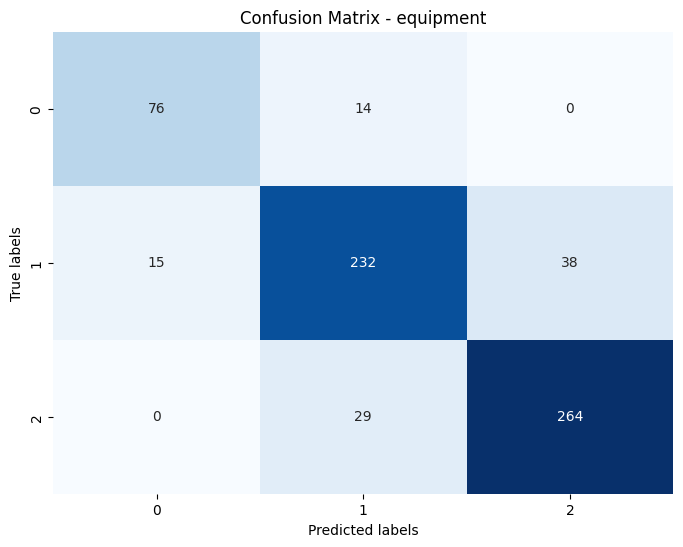

transport 키워드에 대한 최적의 트리 개수: 20
transport 키워드에 대한 최적의 깊이 개수: 15
transport 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8520
transport 키워드에 대한 Test set에 대한 성능
정확도: 0.8728

transport 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8607, 정밀도: 0.8696



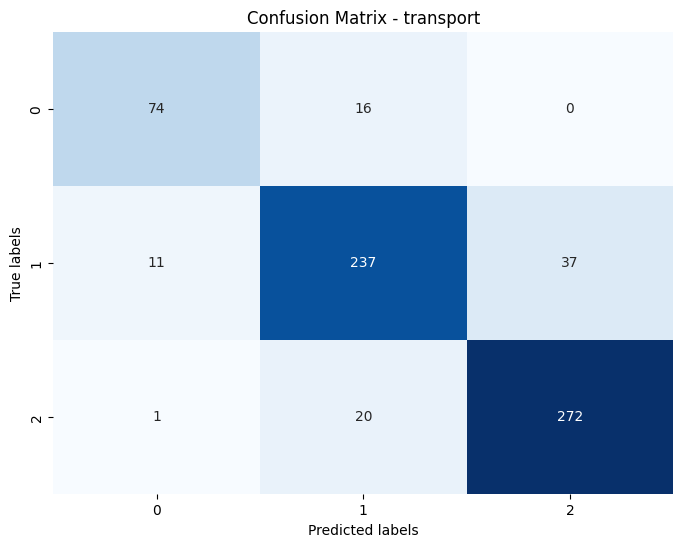

semi 키워드에 대한 최적의 트리 개수: 20
semi 키워드에 대한 최적의 깊이 개수: 16
semi 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8509
semi 키워드에 대한 Test set에 대한 성능
정확도: 0.8638

semi 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8589, 정밀도: 0.8612



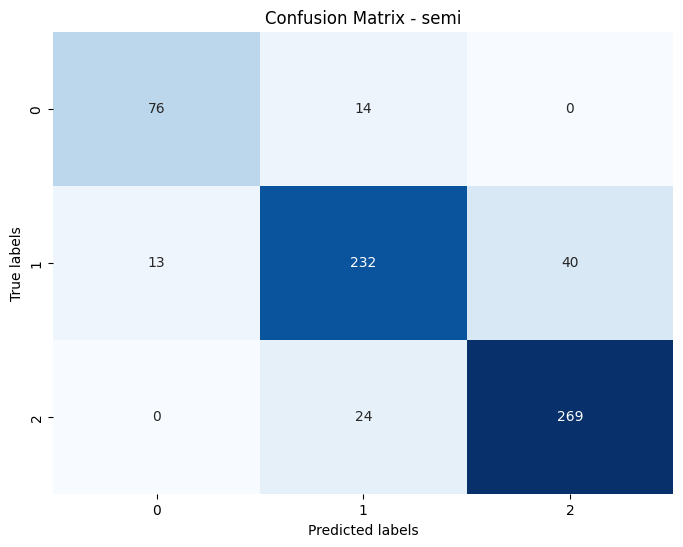

bank 키워드에 대한 최적의 트리 개수: 19
bank 키워드에 대한 최적의 깊이 개수: 20
bank 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8483
bank 키워드에 대한 Test set에 대한 성능
정확도: 0.8608

bank 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8566, 정밀도: 0.8566



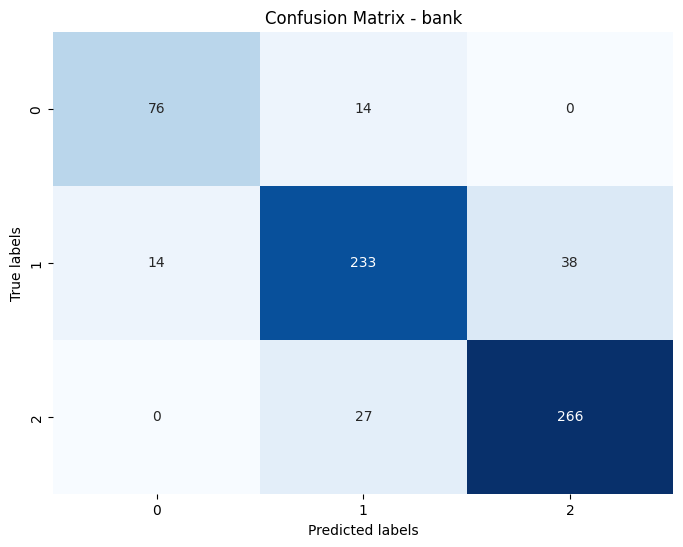

steel 키워드에 대한 최적의 트리 개수: 19
steel 키워드에 대한 최적의 깊이 개수: 20
steel 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8483
steel 키워드에 대한 Test set에 대한 성능
정확도: 0.8608

steel 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8566, 정밀도: 0.8566



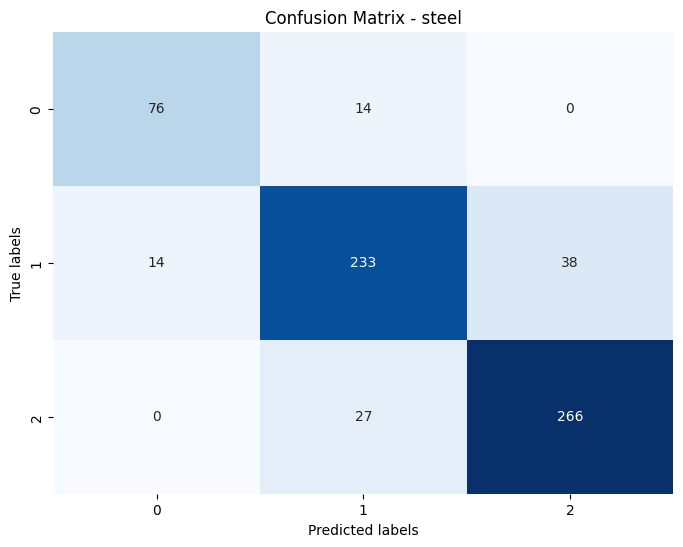

telecom 키워드에 대한 최적의 트리 개수: 14
telecom 키워드에 대한 최적의 깊이 개수: 20
telecom 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8445
telecom 키워드에 대한 Test set에 대한 성능
정확도: 0.8503

telecom 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8460, 정밀도: 0.8459



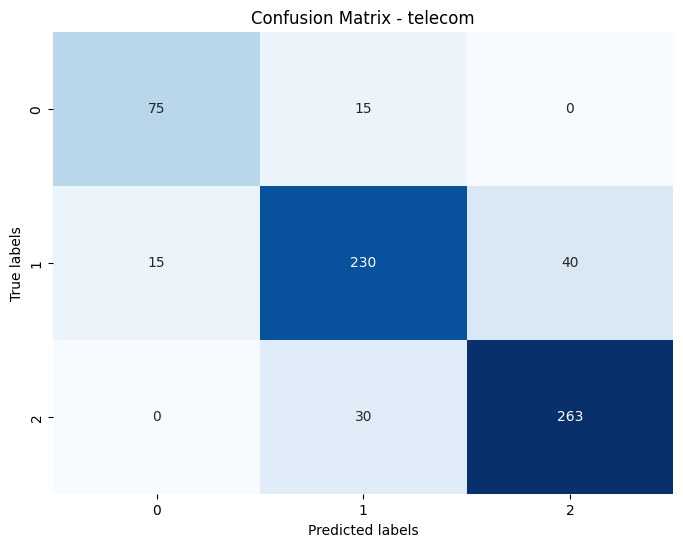

staples 키워드에 대한 최적의 트리 개수: 20
staples 키워드에 대한 최적의 깊이 개수: 19
staples 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8498
staples 키워드에 대한 Test set에 대한 성능
정확도: 0.8608

staples 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8592, 정밀도: 0.8592



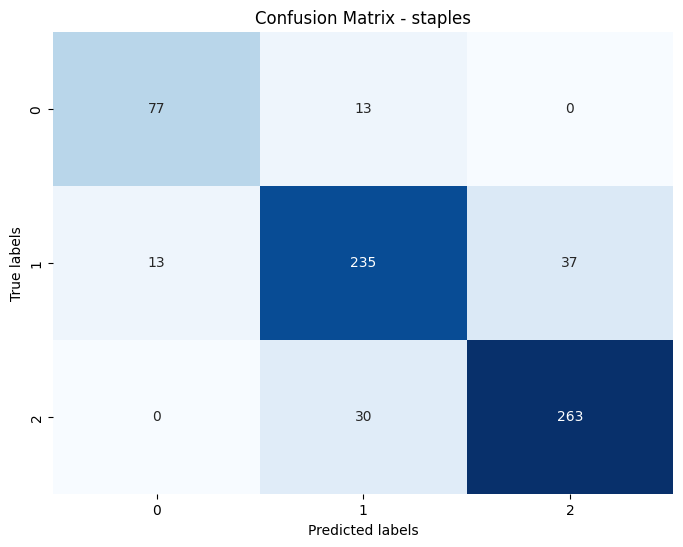

discretionary 키워드에 대한 최적의 트리 개수: 17
discretionary 키워드에 대한 최적의 깊이 개수: 14
discretionary 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8479
discretionary 키워드에 대한 Test set에 대한 성능
정확도: 0.8638

discretionary 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8538, 정밀도: 0.8560



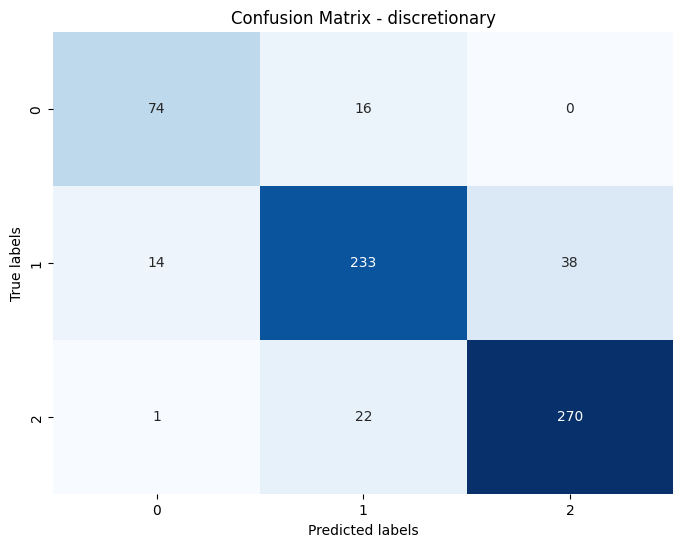

kospi 키워드에 대한 최적의 트리 개수: 20
kospi 키워드에 대한 최적의 깊이 개수: 13
kospi 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)
평균 정확도: 0.8524
kospi 키워드에 대한 Test set에 대한 성능
정확도: 0.8698

kospi 키워드에 대한 Test set에 대한 민감도와 정밀도
민감도: 0.8559, 정밀도: 0.8770



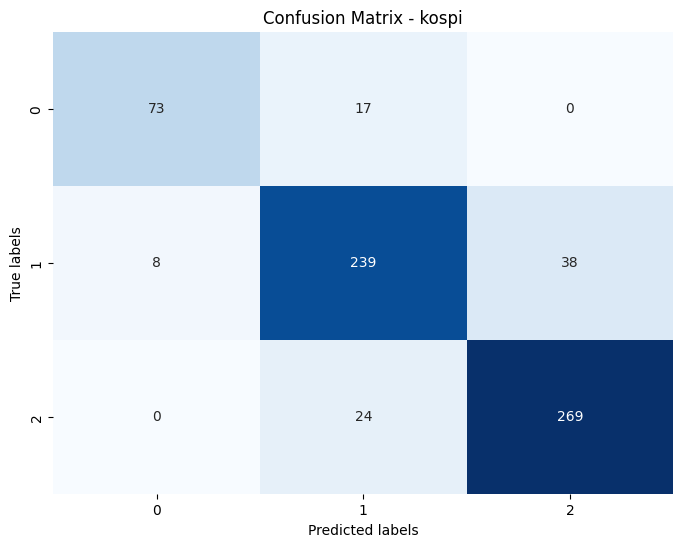

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 각 키워드별 최적의 트리 개수와 최적의 깊이 출력
for keyword in data_splits.keys():
    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]
    print(f"{keyword} 키워드에 대한 최적의 트리 개수: {best_estimator}")
    print(f"{keyword} 키워드에 대한 최적의 깊이 개수: {best_depth}")
    
    # 최적의 트리 개수와 깊이를 사용하여 RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    
    # 교차 검증을 통한 정확도 측정
    cv_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
    
    # 평균 정확도 출력
    print(f"{keyword} 키워드에 대한 Train set에 대한 성능 (10 fold cross validation)")
    print(f"평균 정확도: {cv_scores.mean():.4f}")
    
    # Train set에 대한 최적의 모델 학습
    rfc.fit(X_train, y_train)
    
    # Test set에 대한 예측값 생성
    y_pred = rfc.predict(X_test)
    
    # Test set에 대한 정확도 계산 및 출력
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred)
    print(f"{keyword} 키워드에 대한 Test set에 대한 성능")
    print(f"정확도: {acc_test:.4f}\n")
    
    # Test set에 대한 민감도와 정밀도 계산
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')

    # 민감도와 정밀도 출력
    print(f"{keyword} 키워드에 대한 Test set에 대한 민감도와 정밀도")
    print(f"민감도: {recall:.4f}, 정밀도: {precision:.4f}\n")
    
    # 혼동 행렬 생성
    cm = confusion_matrix(y_test, y_pred)

    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {keyword}')
    plt.show()


### 이후 피처별 중요한 것들을 출력하고 싶었고 키워드별 상위 5개만 출력했다


In [17]:
# 각 키워드별 상위 5개와 하위 5개 특성의 인덱스와 중요도 출력
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]

    # RandomForestClassifier 초기화 및 학습
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    rfc.fit(X_train, y_train)

    # Feature Importance 계산
    feats = {}
    for feature, importance in zip(range(X_train.shape[1]), rfc.feature_importances_):
        feats[feature] = importance

    # 중요도 순으로 정렬하여 상위 5개와 하위 5개 선택
    sorted_feats = sorted(feats.items(), key=lambda x: x[1], reverse=True)
    top_5_importances = sorted_feats[:5]
    bottom_5_importances = sorted_feats[-5:]

    # 결과 출력
    print(f"{keyword} 키워드의 상위 5개 특성:")
    for feature_index, importance in top_5_importances:
        feature_name = column_names_per_keyword[keyword][feature_index]  # 열 이름 가져오기
        print(f"Feature Name: {feature_name}, Importance: {importance:.4f}")
    print()

    print(f"{keyword} 키워드의 하위 5개 특성:")
    for feature_index, importance in bottom_5_importances:
        feature_name = column_names_per_keyword[keyword][feature_index]  # 열 이름 가져오기
        print(f"Feature Name: {feature_name}, Importance: {importance:.4f}")
    print()


auto 키워드의 상위 5개 특성:
Feature Name: export_60, Importance: 0.0211
Feature Name: us_e_infla, Importance: 0.0199
Feature Name: 금 선물_60, Importance: 0.0198
Feature Name: 달러 인덱스_60, Importance: 0.0191
Feature Name: 10년물 _60, Importance: 0.0186

auto 키워드의 하위 5개 특성:
Feature Name: 달러 인덱스, Importance: 0.0056
Feature Name: 중국 소매판매, Importance: 0.0055
Feature Name: MSCI_EMER, Importance: 0.0053
Feature Name: T10Y2Y, Importance: 0.0046
Feature Name: yield_gap(%), Importance: 0.0042

construct 키워드의 상위 5개 특성:
Feature Name: TIPS, Importance: 0.0201
Feature Name: 원달러_60, Importance: 0.0197
Feature Name: 10년물 , Importance: 0.0193
Feature Name: 중국 산업 생산, Importance: 0.0193
Feature Name: cpi_60, Importance: 0.0185

construct 키워드의 하위 5개 특성:
Feature Name: 구리선물, Importance: 0.0059
Feature Name: 달러 인덱스, Importance: 0.0053
Feature Name: VIX, Importance: 0.0049
Feature Name: T10Y2Y, Importance: 0.0046
Feature Name: yield_gap(%), Importance: 0.0032

capital_market 키워드의 상위 5개 특성:
Feature Name: T10Y2Y_60, Importan

### 이후 이것을 그래프로 변환해서 출력
### 생각보다 자동차지수와 중국 지표 금 구리 이런게 영향을 많이 미치는구마잉!

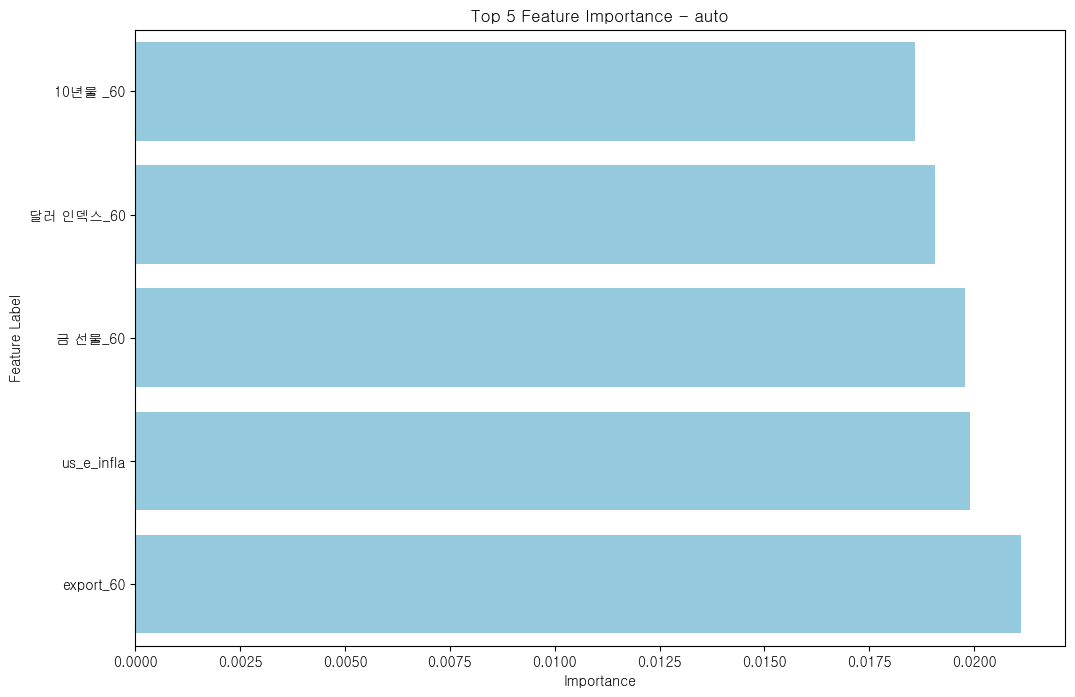

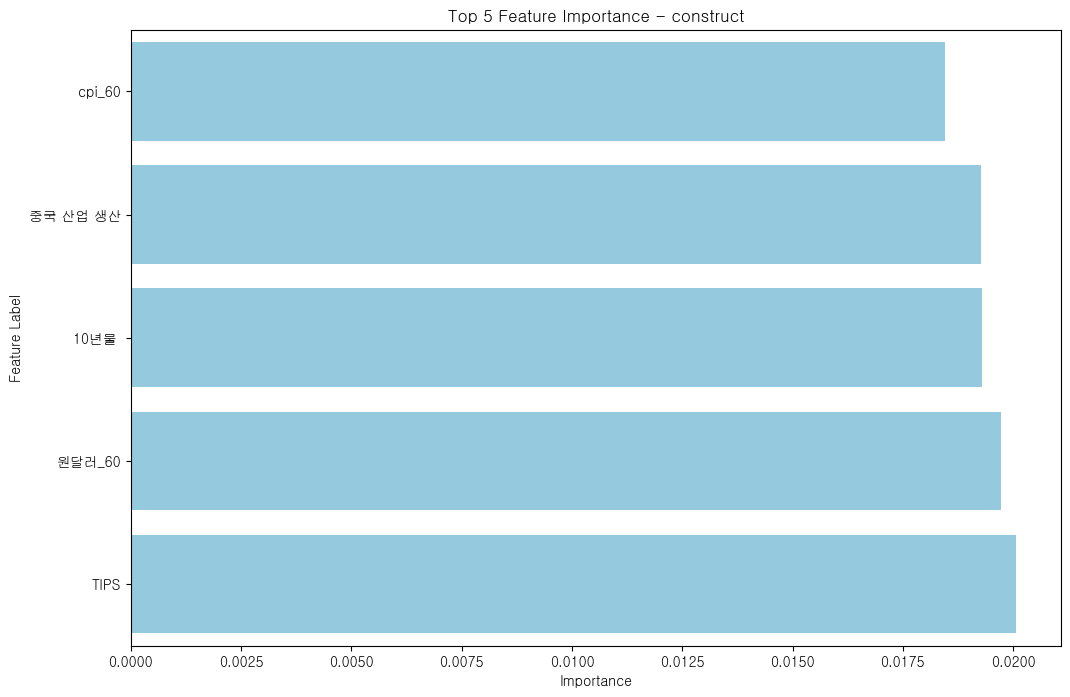

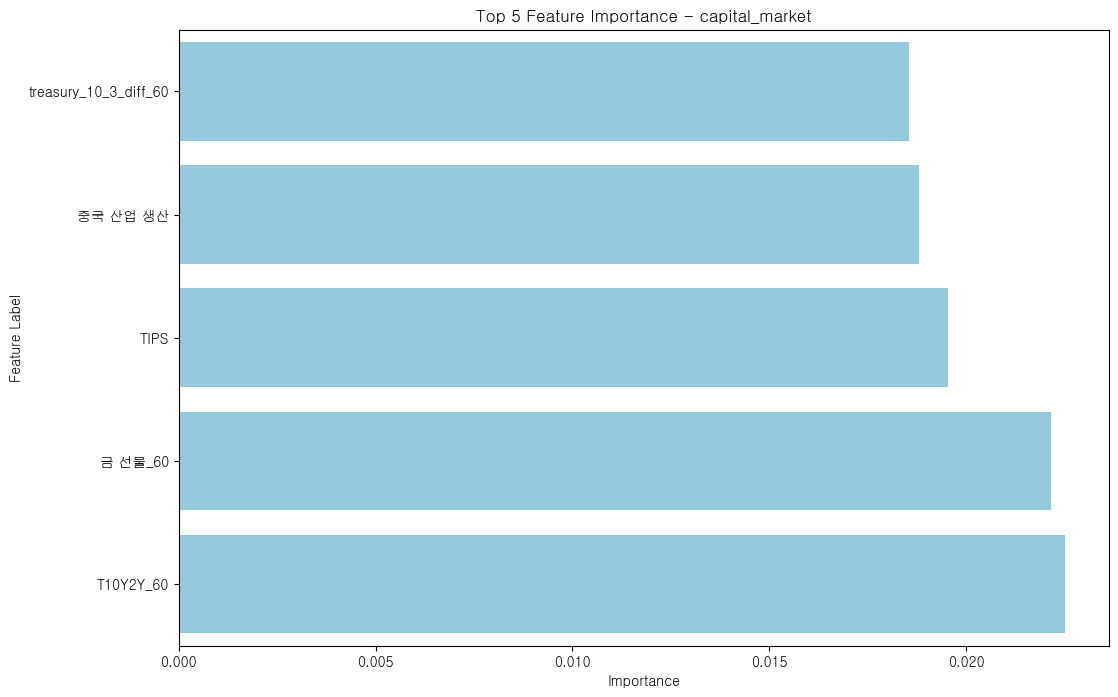

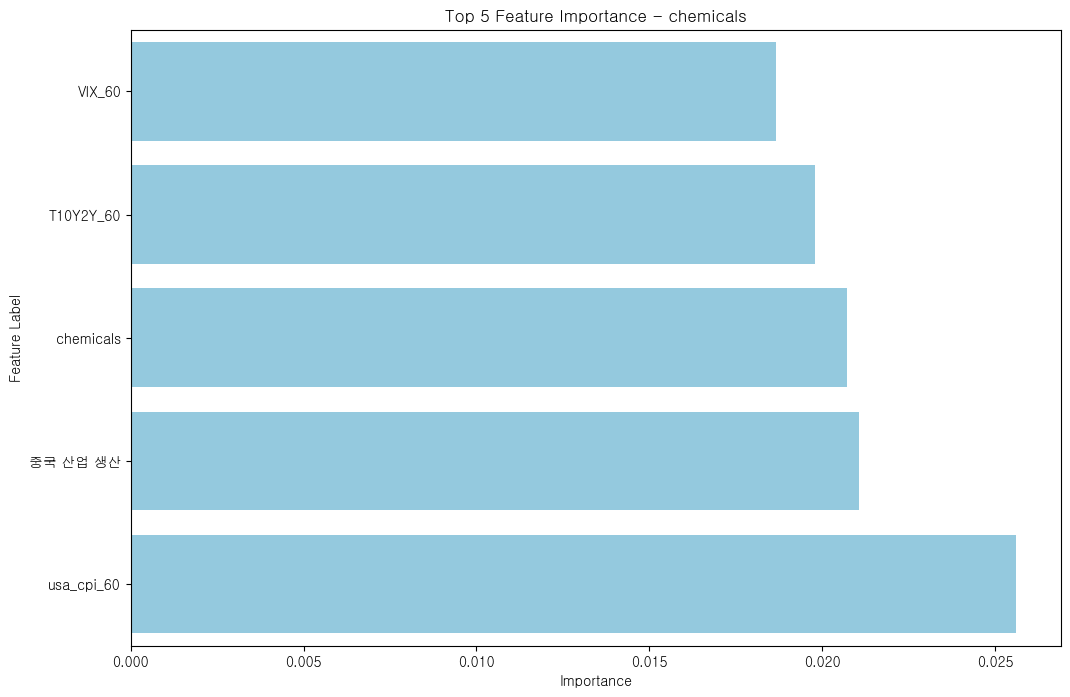

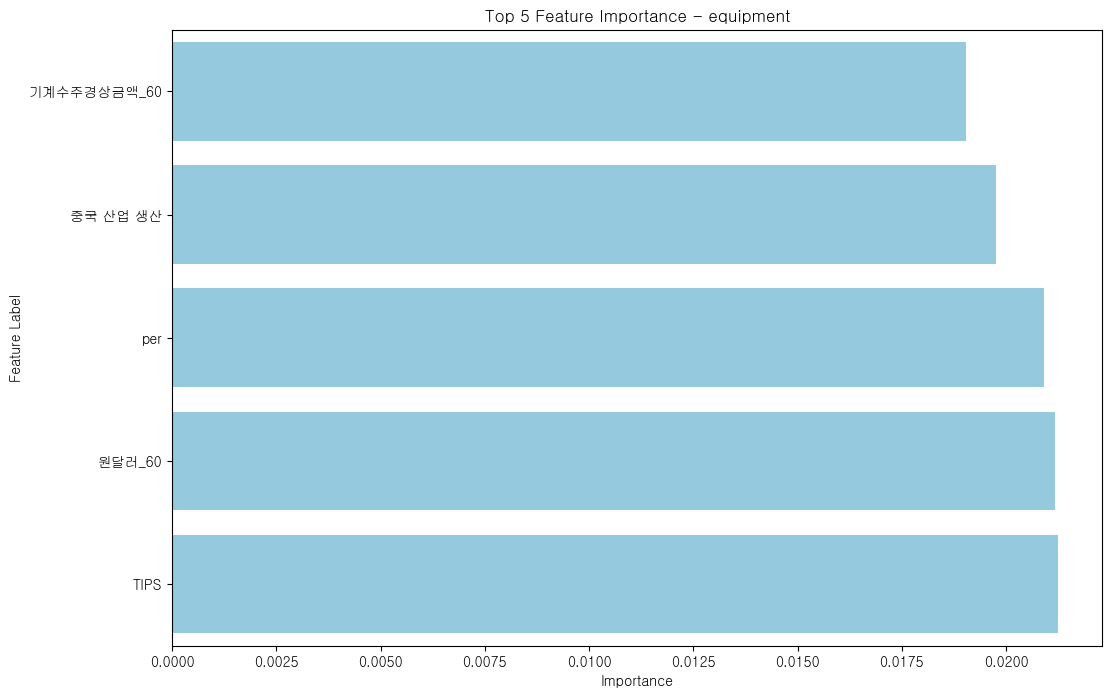

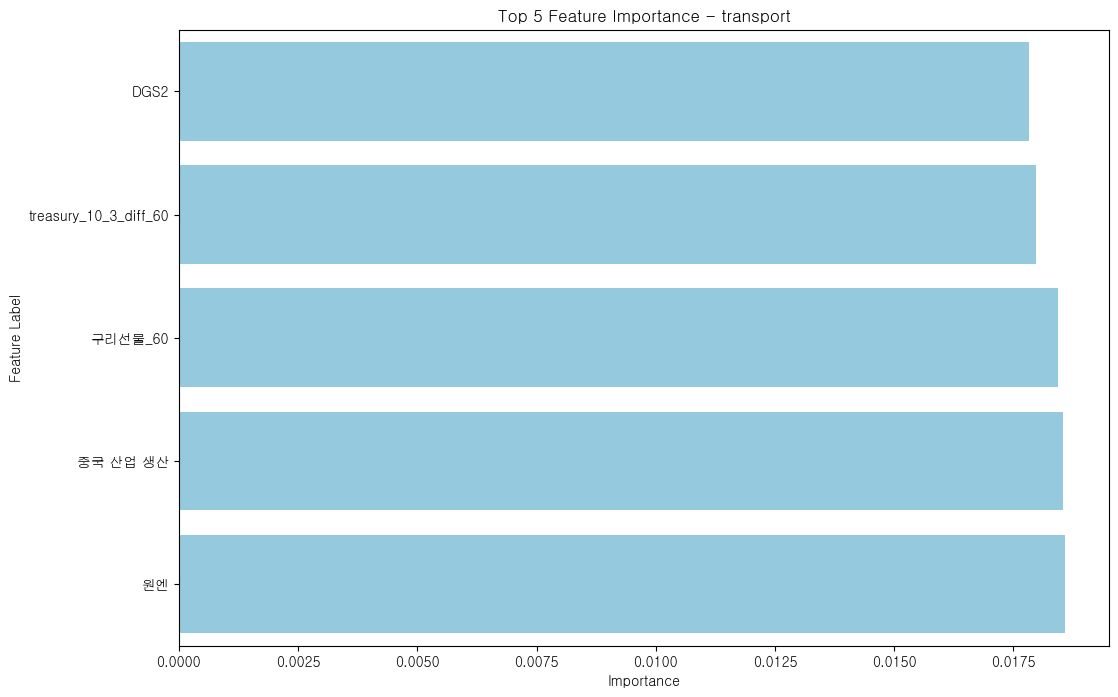

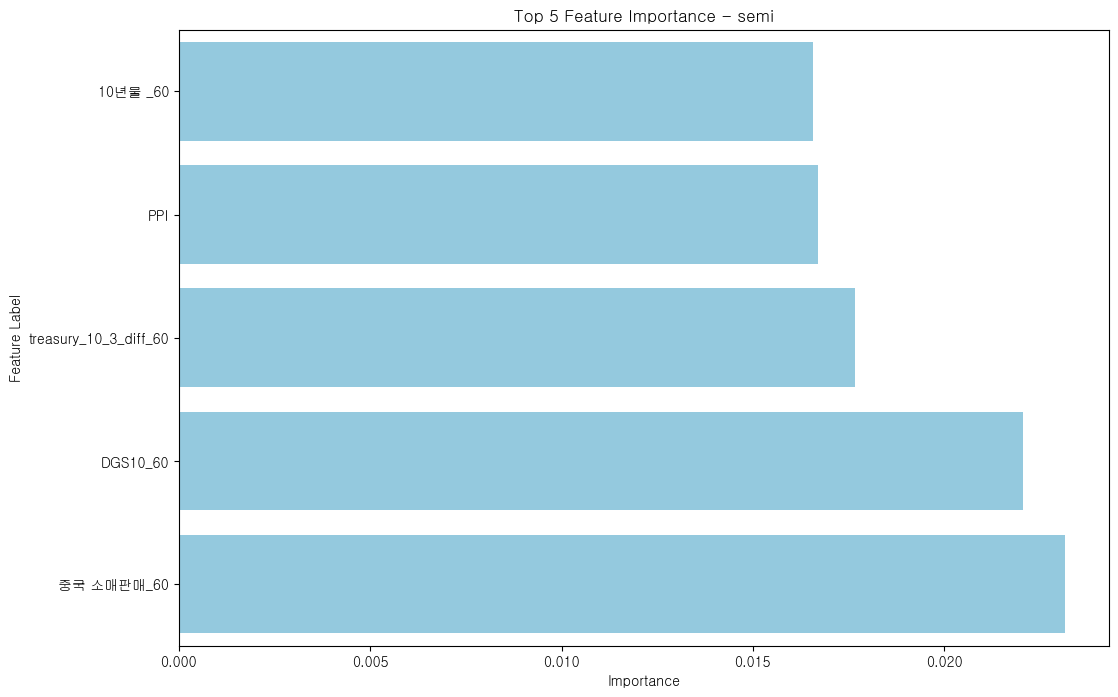

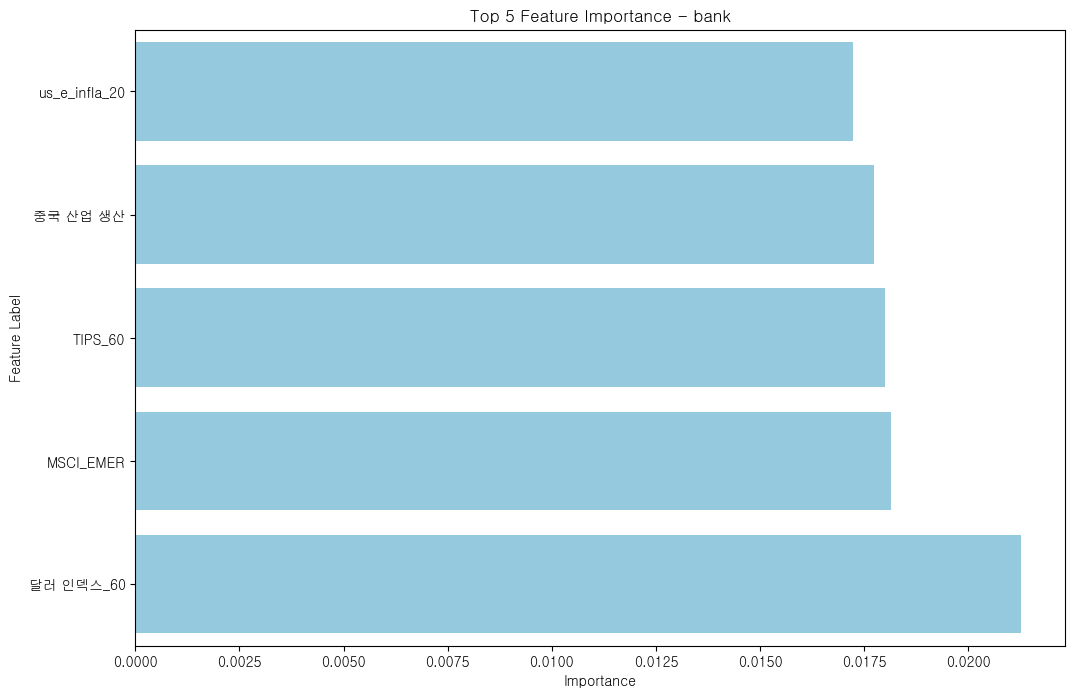

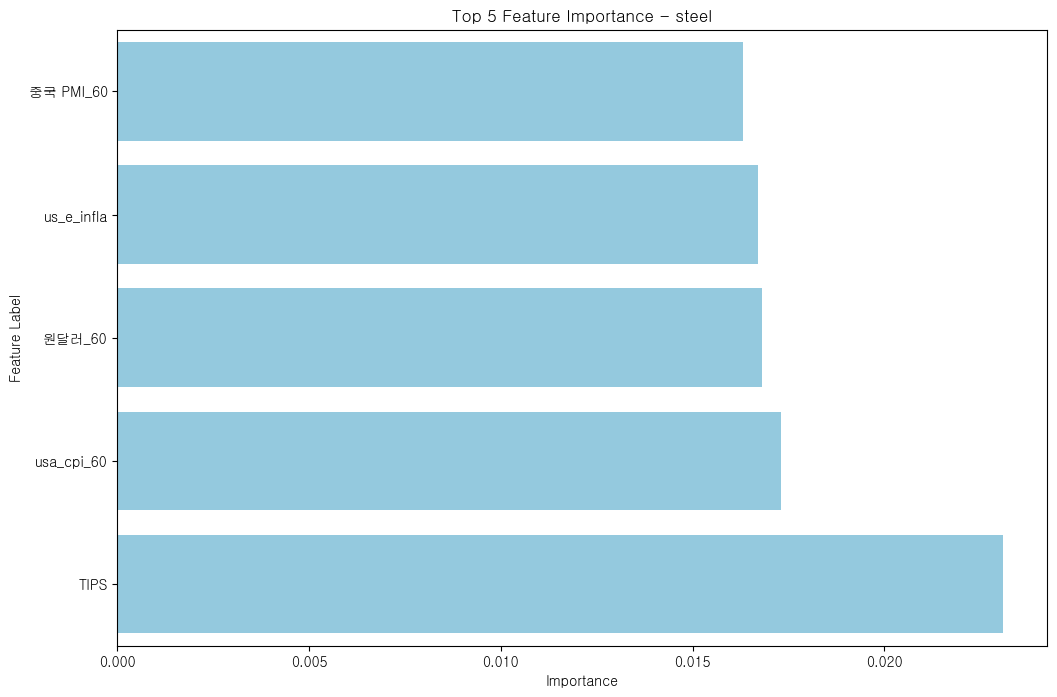

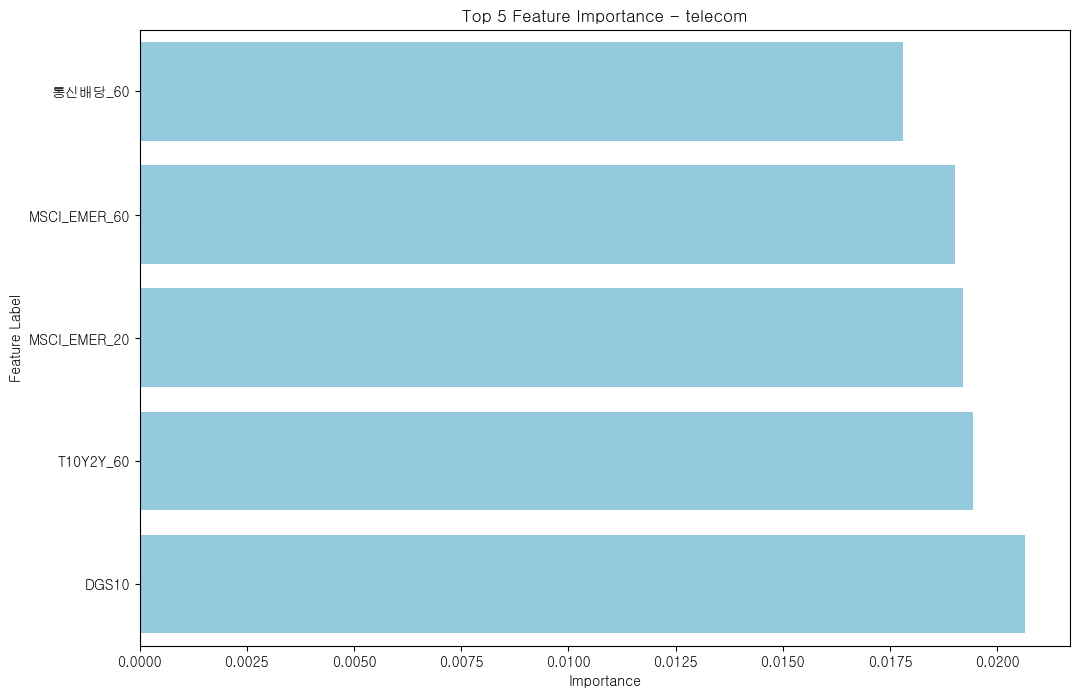

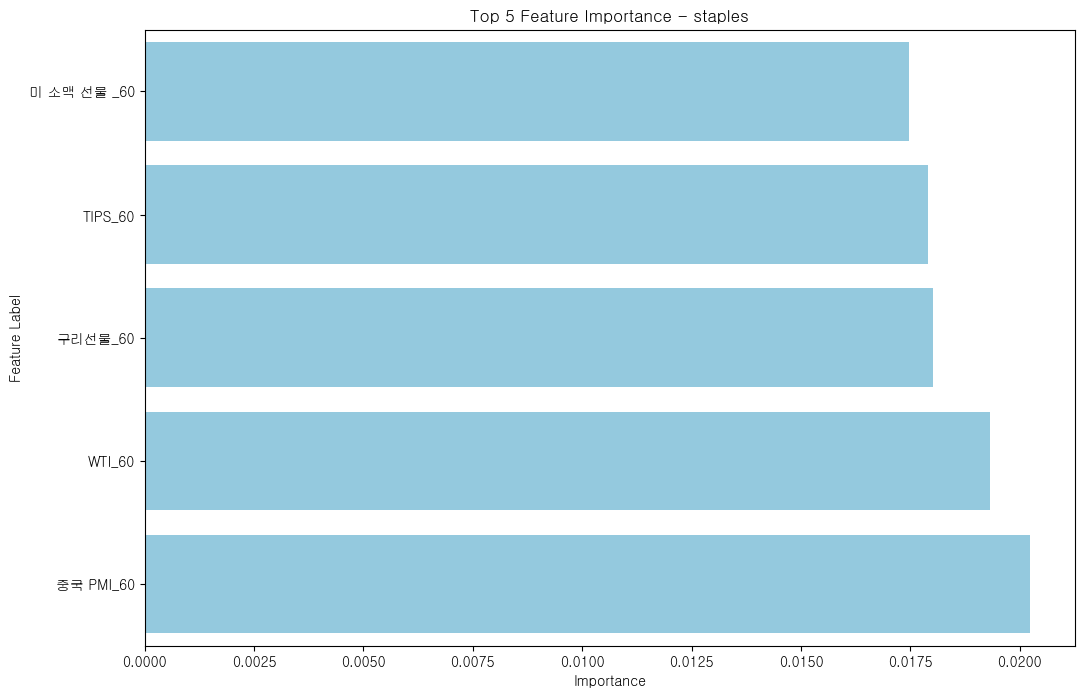

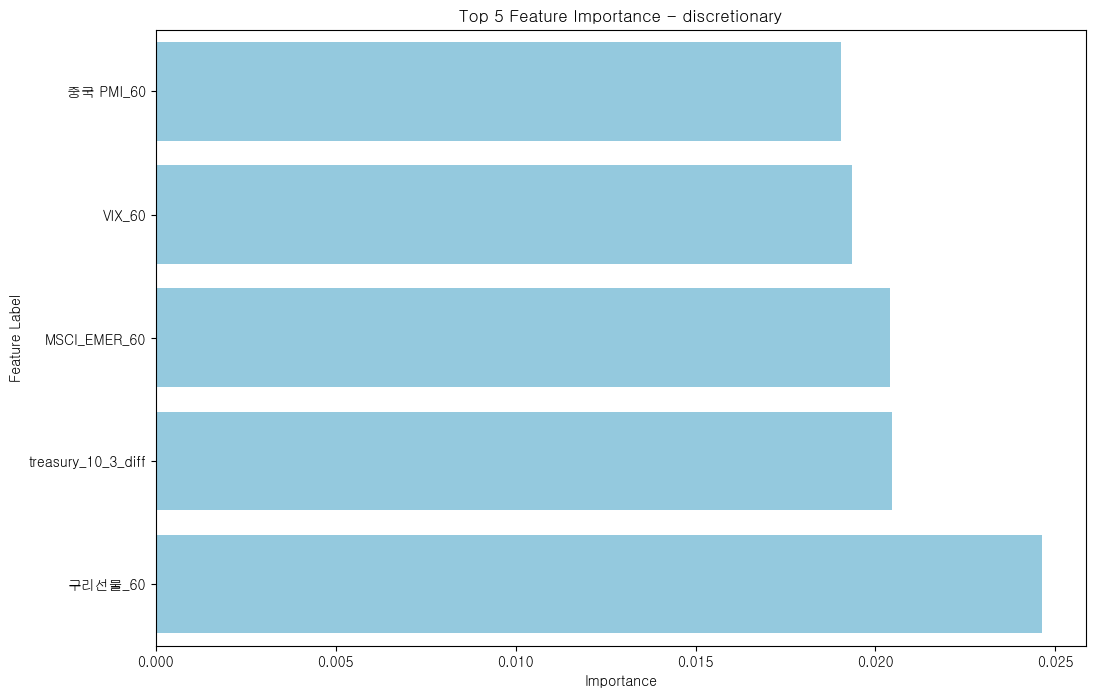

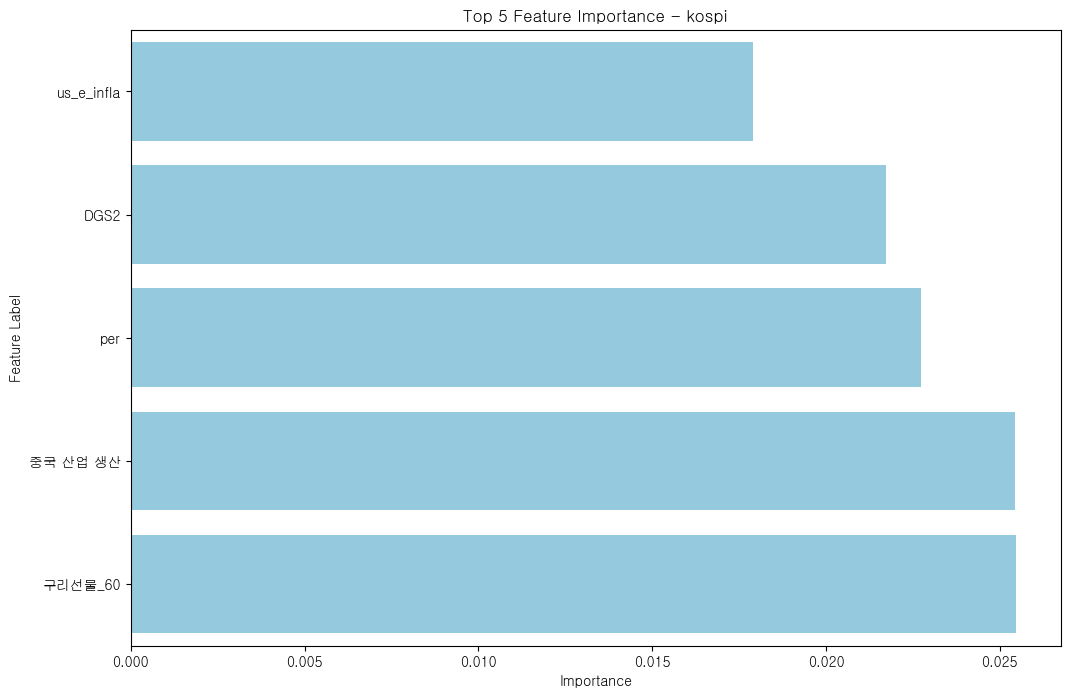

In [18]:
# 상위 5개 특성의 이름과 중요도 분리하여 그래프 출력
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
from matplotlib import font_manager, rc
path = f'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    best_estimator = best_estimators_per_keyword[keyword]
    best_depth = best_depths_per_keyword[keyword]

    # RandomForestClassifier 초기화 및 학습
    rfc = RandomForestClassifier(n_estimators=best_estimator, 
                                 max_depth=best_depth, 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)
    rfc.fit(X_train, y_train)

    # Feature Importance 계산
    feats = {}
    for feature, importance in zip(range(X_train.shape[1]), rfc.feature_importances_):
        feats[feature] = importance

    # 중요도 순으로 정렬하여 상위 5개 선택
    sorted_feats = sorted(feats.items(), key=lambda x: x[1], reverse=True)
    top_5_importances = sorted_feats[:5]

    # 상위 5개 특성의 이름과 중요도 분리
    top_5_features = [column_names_per_keyword[keyword][feature_index] for feature_index, _ in top_5_importances]
    top_5_importance_values = [importance for _, importance in top_5_importances]

    # 그래프 출력
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_5_importance_values, y=top_5_features, color='skyblue')
    plt.title(f'Top 5 Feature Importance - {keyword}')
    plt.xlabel('Importance')
    plt.ylabel('Feature Label')
    plt.gca().invert_yaxis()  # y축 라벨 역순으로 표시
    plt.show()


### 모델을 저장하고 다시 불러옴

### 모델을 통해서 다음날이 어떨지에 대해서 예측해봄

### 모델 저장은 성공적!

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 디렉토리가 없다면 생성
if not os.path.exists('plk_folder_05_new_new'):
    os.makedirs('plk_folder_05_new_new')

# 각 키워드별로 최종 모델 학습 및 모델 저장
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']

    # RandomForestClassifier 초기화
    rfc = RandomForestClassifier(n_estimators=best_estimators_per_keyword[keyword], 
                                 max_depth=best_depths_per_keyword[keyword], 
                                 max_leaf_nodes=300,
                                 n_jobs=-1,
                                 random_state=0)

    # 최종 모델 학습
    rfc.fit(X_train, y_train)

    # 모델 저장
    filename = f"plk_folder_05_new_new/{keyword}_model.pkl"
    dump(rfc, filename)
    print(f"Model for {keyword} keyword saved as {filename}")

print("\n< AI model: save >")

# 모델 로드
loaded_models = {}

# 각 키워드별로 모델 로드
for keyword in keywords:
    filename = f"plk_folder_05_new_new/{keyword}_model.pkl"
    if os.path.exists(filename):
        loaded_models[keyword] = load(filename)
        print(f"Model for {keyword} keyword loaded from {filename}")
    else:
        print(f"Model file for {keyword} keyword does not exist: {filename}")

print("\n< AI model: load >")


# Train set 및 Test set에 대한 성능을 저장할 딕셔너리 생성

# Random Forest 모델 생성


# 각 키워드에 대해 모델을 학습하고 Train set 및 Test set에 대한 성능을 측정
for keyword, data_split in data_splits.items():
    X_train = data_split['X_train']
    y_train = data_split['y_train']
    X_test = data_split['X_test']
    y_test = data_split['y_test']
    
    # 모델 학습
    rfc.fit(X_train, y_train)

    # Train set에 대한 성능 측정
    y_pred_train = rfc.predict(X_train)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)

    # Test set에 대한 성능 측정
    y_pred_test = rfc.predict(X_test)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    # 결과 저장
    loaded_models[keyword] = {
        'Train 성능': acc_train,
        'Test 성능': acc_test
    }

# 각 키워드에 대한 Train set 및 Test set의 성능 출력
for keyword, performance in loaded_models.items():
    print(f"{keyword} 키워드에 대한 성능: ",performance['Test 성능'])
    print()

Model for auto keyword saved as plk_folder_05_new_new/auto_model.pkl
Model for construct keyword saved as plk_folder_05_new_new/construct_model.pkl
Model for capital_market keyword saved as plk_folder_05_new_new/capital_market_model.pkl
Model for chemicals keyword saved as plk_folder_05_new_new/chemicals_model.pkl
Model for equipment keyword saved as plk_folder_05_new_new/equipment_model.pkl
Model for transport keyword saved as plk_folder_05_new_new/transport_model.pkl
Model for semi keyword saved as plk_folder_05_new_new/semi_model.pkl
Model for bank keyword saved as plk_folder_05_new_new/bank_model.pkl
Model for steel keyword saved as plk_folder_05_new_new/steel_model.pkl
Model for telecom keyword saved as plk_folder_05_new_new/telecom_model.pkl
Model for staples keyword saved as plk_folder_05_new_new/staples_model.pkl
Model for discretionary keyword saved as plk_folder_05_new_new/discretionary_model.pkl
Model for kospi keyword saved as plk_folder_05_new_new/kospi_model.pkl

< AI mod

In [20]:
# 결측치 제거 이후의 데이터프레임의 마지막 행 출력
for keyword, last_row in last_rows.items():
    print(f"마지막 행 {keyword}: {last_row}")
    print(len(last_row))

마지막 행 auto: auto                   NaN
WTI               82.64456
DGS2                   4.7
DGS10                 4.29
TIPS                  2.03
                    ...   
중국 소매판매_60       -0.014316
중국 산업 생산_60      -0.001674
MSCI_EMER_60      0.000951
US_auto_60        0.000311
export_auto_60     0.00601
Name: 2024-06-28, Length: 88, dtype: object
88
마지막 행 construct: construct            NaN
WTI             82.64456
DGS2                 4.7
DGS10               4.29
TIPS                2.03
                  ...   
중국 소매판매_60     -0.014316
중국 산업 생산_60    -0.001674
MSCI_EMER_60    0.000951
매매가격지수_60      -0.000011
아파트매매거래량_60     0.005749
Name: 2024-06-28, Length: 88, dtype: object
88
마지막 행 capital_market: capital_market         NaN
WTI               82.64456
DGS2                   4.7
DGS10                 4.29
TIPS                  2.03
                    ...   
중국 소매판매_60       -0.014316
중국 산업 생산_60      -0.001674
MSCI_EMER_60      0.000951
증권 배당 수익률_60      0.003528
코스피+코스닥 거래량_6

In [21]:
loaded_models = {}

# 각 키워드별로 모델 로드
for keyword in keywords:
    filename = f"plk_folder_05_new_new/{keyword}_model.pkl"
    if os.path.exists(filename):
        # 모델을 로드하고 loaded_models 딕셔너리에 저장
        loaded_models[keyword] = load(filename)
        print(f"Model for {keyword} keyword loaded from {filename}")
    else:
        print(f"Model file for {keyword} keyword does not exist: {filename}")

# 각 키워드별로 S_buy, buy, sell의 확률 예측
probabilities = {}
for keyword, model in loaded_models.items():
    # 마지막 행 데이터를 가져와서 예측에 사용
    X_test_last_row_keyword = last_rows[keyword].values.reshape(1, -1)
    # 첫 번째 열(해당 키워드)을 제외하고 예측에 사용
    X_test_last_row_keyword = X_test_last_row_keyword[:, 1:]
    # 각 클래스의 확률 예측
    prob_current = model.predict_proba(X_test_last_row_keyword)
    # 클래스 이름 가져오기
    y_names = model.classes_
    # 결과 저장
    probabilities[keyword] = {'S_buy': prob_current[0][0], 'buy': prob_current[0][1], 'sell': prob_current[0][2]}

# 출력
for keyword, probs in probabilities.items():
    print(keyword)
    for action, prob in probs.items():
        print(f'{action}: {prob:.4f}')
    print()


Model for auto keyword loaded from plk_folder_05_new_new/auto_model.pkl
Model for construct keyword loaded from plk_folder_05_new_new/construct_model.pkl
Model for capital_market keyword loaded from plk_folder_05_new_new/capital_market_model.pkl
Model for chemicals keyword loaded from plk_folder_05_new_new/chemicals_model.pkl
Model for equipment keyword loaded from plk_folder_05_new_new/equipment_model.pkl
Model for transport keyword loaded from plk_folder_05_new_new/transport_model.pkl
Model for semi keyword loaded from plk_folder_05_new_new/semi_model.pkl
Model for bank keyword loaded from plk_folder_05_new_new/bank_model.pkl
Model for steel keyword loaded from plk_folder_05_new_new/steel_model.pkl
Model for telecom keyword loaded from plk_folder_05_new_new/telecom_model.pkl
Model for staples keyword loaded from plk_folder_05_new_new/staples_model.pkl
Model for discretionary keyword loaded from plk_folder_05_new_new/discretionary_model.pkl
Model for kospi keyword loaded from plk_fold

auto
0.1218   0.4114   0.4668   
construct
0.3487   0.1231   0.5282   
capital_market
0.0833   0.1715   0.7452   
chemicals
0.3364   0.2254   0.4382   
equipment
0.3753   0.1290   0.4957   
transport
0.3077   0.2633   0.4290   
semi
0.2249   0.3077   0.4675   
bank
0.2650   0.3184   0.4167   
steel
0.2632   0.4750   0.2618   
telecom
0.2857   0.1429   0.5714   
staples
0.1500   0.4564   0.3936   
discretionary
0.1818   0.4258   0.3924   
kospi
0.2056   0.4426   0.3518   


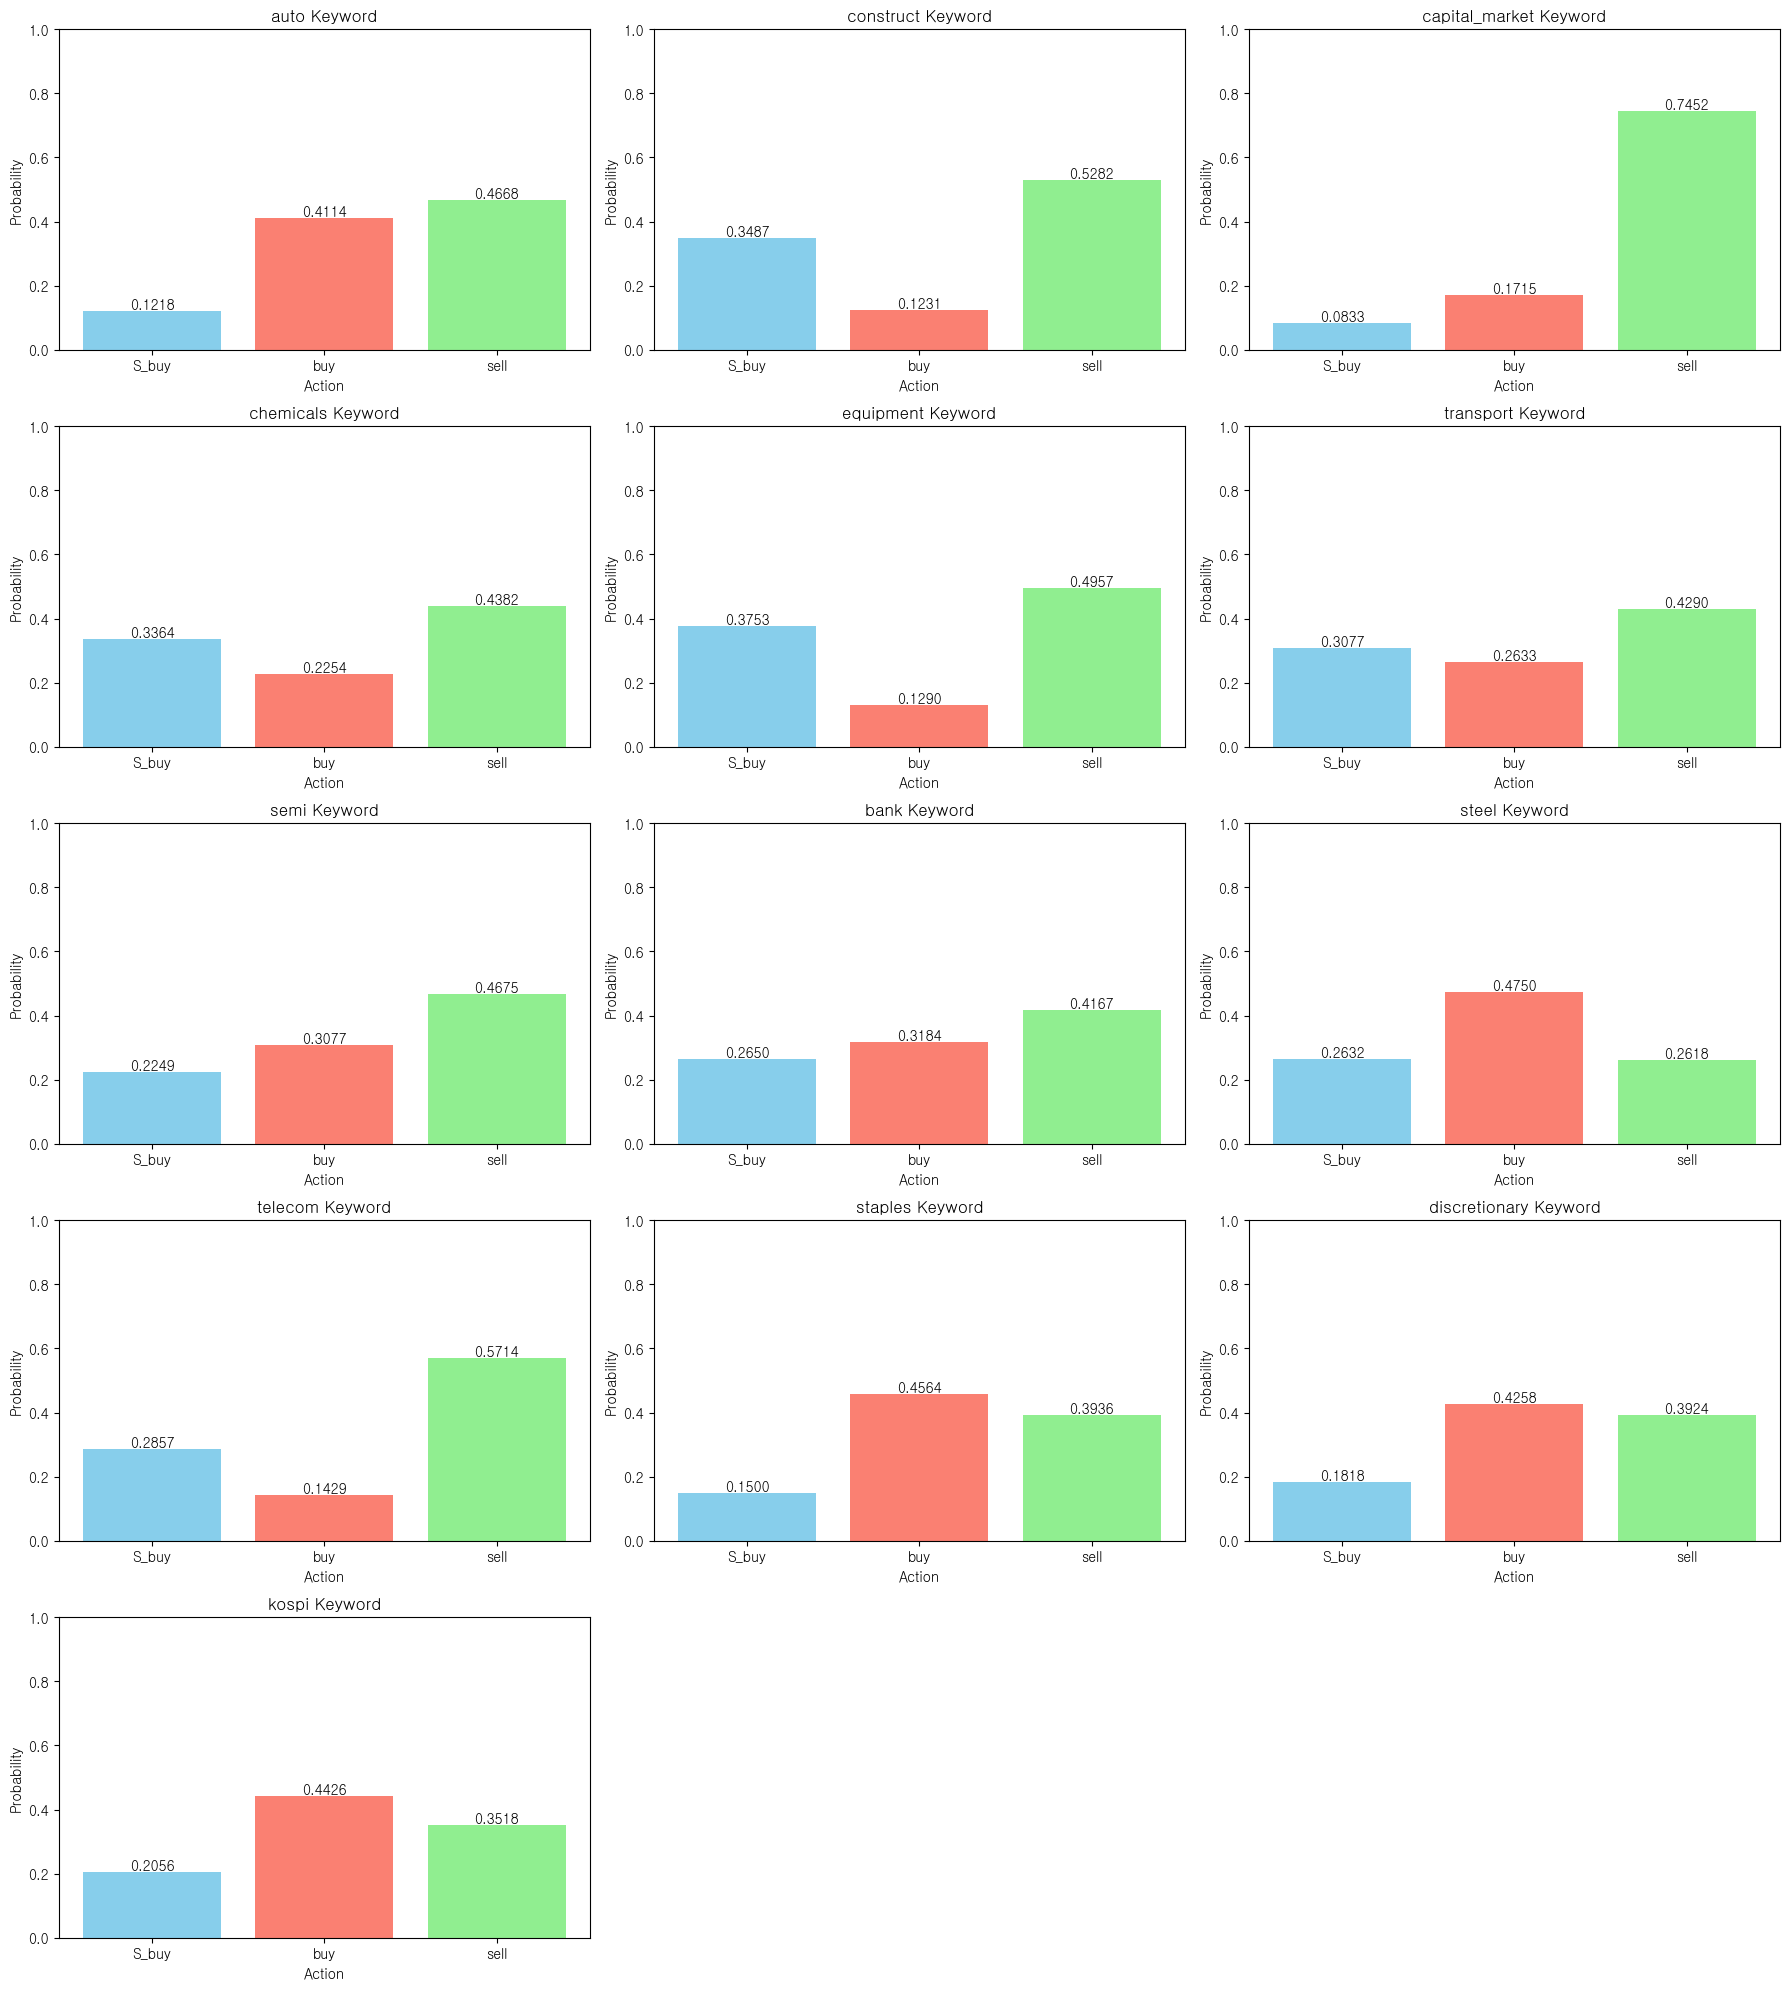

In [22]:
# 그래프로 출력
num_keywords = len(probabilities)
num_rows = (num_keywords + 2) // 3
num_cols = min(num_keywords, 3)
plt.figure(figsize=(6 * num_cols, 4 * num_rows))

for i, (keyword, probs) in enumerate(probabilities.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.bar(probs.keys(), probs.values(), color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f'{keyword} Keyword')
    plt.xlabel('Action')
    plt.ylabel('Probability')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    print(f'{keyword}')
    for j, prob in enumerate(probs.values()):
        plt.text(j, prob, f'{prob:.4f}', ha='center', va='bottom')
        print(f'{prob:.4f}',end="   ")
    print()
plt.tight_layout()
plt.show()

In [23]:
import numpy as np
import pandas as pd
import os
from joblib import load
import matplotlib.pyplot as plt

# Load the backtesting data
backtesting_path = "backtesting_raw.xlsx"
backtesting_data = pd.read_excel(backtesting_path, sheet_name=None)

# Define keywords (assuming they are the sheet names)
keywords = backtesting_data.keys()

# Load the saved models
model_dir = "plk_folder_05_new_new"
loaded_models = {}
for keyword in keywords:
    model_path = os.path.join(model_dir, f"{keyword}_model.pkl")
    if os.path.exists(model_path):
        loaded_models[keyword] = load(model_path)
        print(f"{keyword} 키워드의 모델을 {model_path}에서 로드했습니다.")
    else:
        print(f"{keyword} 키워드의 모델 파일이 {model_path}에 존재하지 않습니다.")

auto 키워드의 모델을 plk_folder_05_new_new\auto_model.pkl에서 로드했습니다.
construct 키워드의 모델을 plk_folder_05_new_new\construct_model.pkl에서 로드했습니다.
capital_market 키워드의 모델을 plk_folder_05_new_new\capital_market_model.pkl에서 로드했습니다.
chemicals 키워드의 모델을 plk_folder_05_new_new\chemicals_model.pkl에서 로드했습니다.
equipment 키워드의 모델을 plk_folder_05_new_new\equipment_model.pkl에서 로드했습니다.
transport 키워드의 모델을 plk_folder_05_new_new\transport_model.pkl에서 로드했습니다.
semi 키워드의 모델을 plk_folder_05_new_new\semi_model.pkl에서 로드했습니다.
bank 키워드의 모델을 plk_folder_05_new_new\bank_model.pkl에서 로드했습니다.
steel 키워드의 모델을 plk_folder_05_new_new\steel_model.pkl에서 로드했습니다.
telecom 키워드의 모델을 plk_folder_05_new_new\telecom_model.pkl에서 로드했습니다.
staples 키워드의 모델을 plk_folder_05_new_new\staples_model.pkl에서 로드했습니다.
discretionary 키워드의 모델을 plk_folder_05_new_new\discretionary_model.pkl에서 로드했습니다.
kospi 키워드의 모델을 plk_folder_05_new_new\kospi_model.pkl에서 로드했습니다.


In [24]:
# Convert the index of each DataFrame to date format and then to string
for keyword, df in backtesting_data.items():
    df.index = pd.to_datetime(df.index)
    df.index = df.index.strftime('%Y-%m-%d')
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'date'}, inplace=True)  # 'date' 열이 존재하도록 만듭니다.

In [25]:
# Perform predictions for each row
all_predictions = {}

for keyword, df in backtesting_data.items():
    if keyword in loaded_models:
        model = loaded_models[keyword]
        predictions = []
        for idx, row in df.iterrows():
            date = row['date']
            X_test = row.drop('date').values.reshape(1, -1)
            probabilities = model.predict_proba(X_test)[0]
            predictions.append({
                'date': date,
                'S_buy': probabilities[0],
                'buy': probabilities[1],
                'sell': probabilities[2]
            })
        all_predictions[keyword] = pd.DataFrame(predictions)

In [26]:
# Save the predictions to an Excel file with separate sheets for each keyword
output_path = "predictions_v2.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for keyword, predictions_df in all_predictions.items():
        predictions_df.to_excel(writer, sheet_name=keyword, index=False)
print(f"예측 결과가 {output_path}에 저장되었습니다.")

# Display the first few rows of each sheet to verify
for keyword, predictions_df in all_predictions.items():
    print(f"\n{keyword} 키워드의 예측 결과:")
    print(predictions_df.head())

예측 결과가 predictions_v2.xlsx에 저장되었습니다.

auto 키워드의 예측 결과:
                                                date     S_buy       buy  \
0  date             1970-01-01
date    2010-05-03...  0.233512  0.358307   
1  date             1970-01-01
date    2010-06-01...  0.233512  0.358307   
2  date             1970-01-01
date    2010-07-01...  0.233512  0.358307   
3  date             1970-01-01
date    2010-08-02...  0.233512  0.358307   
4  date             1970-01-01
date    2010-09-01...  0.233512  0.358307   

       sell  
0  0.408181  
1  0.408181  
2  0.408181  
3  0.408181  
4  0.408181  

construct 키워드의 예측 결과:
                                                date     S_buy       buy  \
0  date             1970-01-01
date    2010-05-03...  0.231061  0.006987   
1  date             1970-01-01
date    2010-06-01...  0.231061  0.006987   
2  date             1970-01-01
date    2010-07-01...  0.231061  0.006987   
3  date             1970-01-01
date    2010-08-02...  0.231061  0.006987   
4